# Introduction
&emsp;Before I start with the motivation and the goals of this project, I'd like to provide an explanation of the video game for those who don't know what it is about. For those of you who are familiar with it, feel free to skip the next paragraph. <br><br>
&emsp;__League of Legends__ is a *Multiplayer Online Battle Arena* (MOBA) where two teams of 5 players each compete against each other to destroy the enemy *Nexus*. Even though there are several different game modes and maps in the game, we are going to focus on the by far most popular map, the *Summoner's Rift*. Each player has the control of a unique champion that is selected before the game starts, each one has unique abilities and there are several different "groups of champions" with their own different playstyles that are unique and essential to the game. The roles most often refer to the part of the map where each player commits to. In order to win the game, champions have to become stronger and they can do that in two different ways; They can either stay engaged in combat and earn experience to level up their character or kill enemy units to earn gold which is used to purchase items in the shop. This is a very, very basic introduction to the game and even though you might be able to get to know the game on the go, it might not (likely won't) be sufficient. I don't want to make the introduction too long so I left the basic explanation here and for those of you who feel like it, can read the more broad explanation here: https://www.riftherald.com/2016/9/29/13027318/lol-guide-how-to-watch-play-intro
<br><br>
&emsp;Without getting too much into the final goals of this project (I am going to leave that to the "Prediction" section), I am going to give some intuition for the EDA. First, we are going to clean and get to know the data, we are going to explore the problem and the different solutions to it and how we might tackle it. Then, statistical analysis of the features and establishing some basic hypotheses (how different features could influence the outcome of the game). The final goal is to be able to predict the probability that the 2 teams have in winning the game so we are also going to explore different features and dataset versions that could provide different and better results.
<br><br>
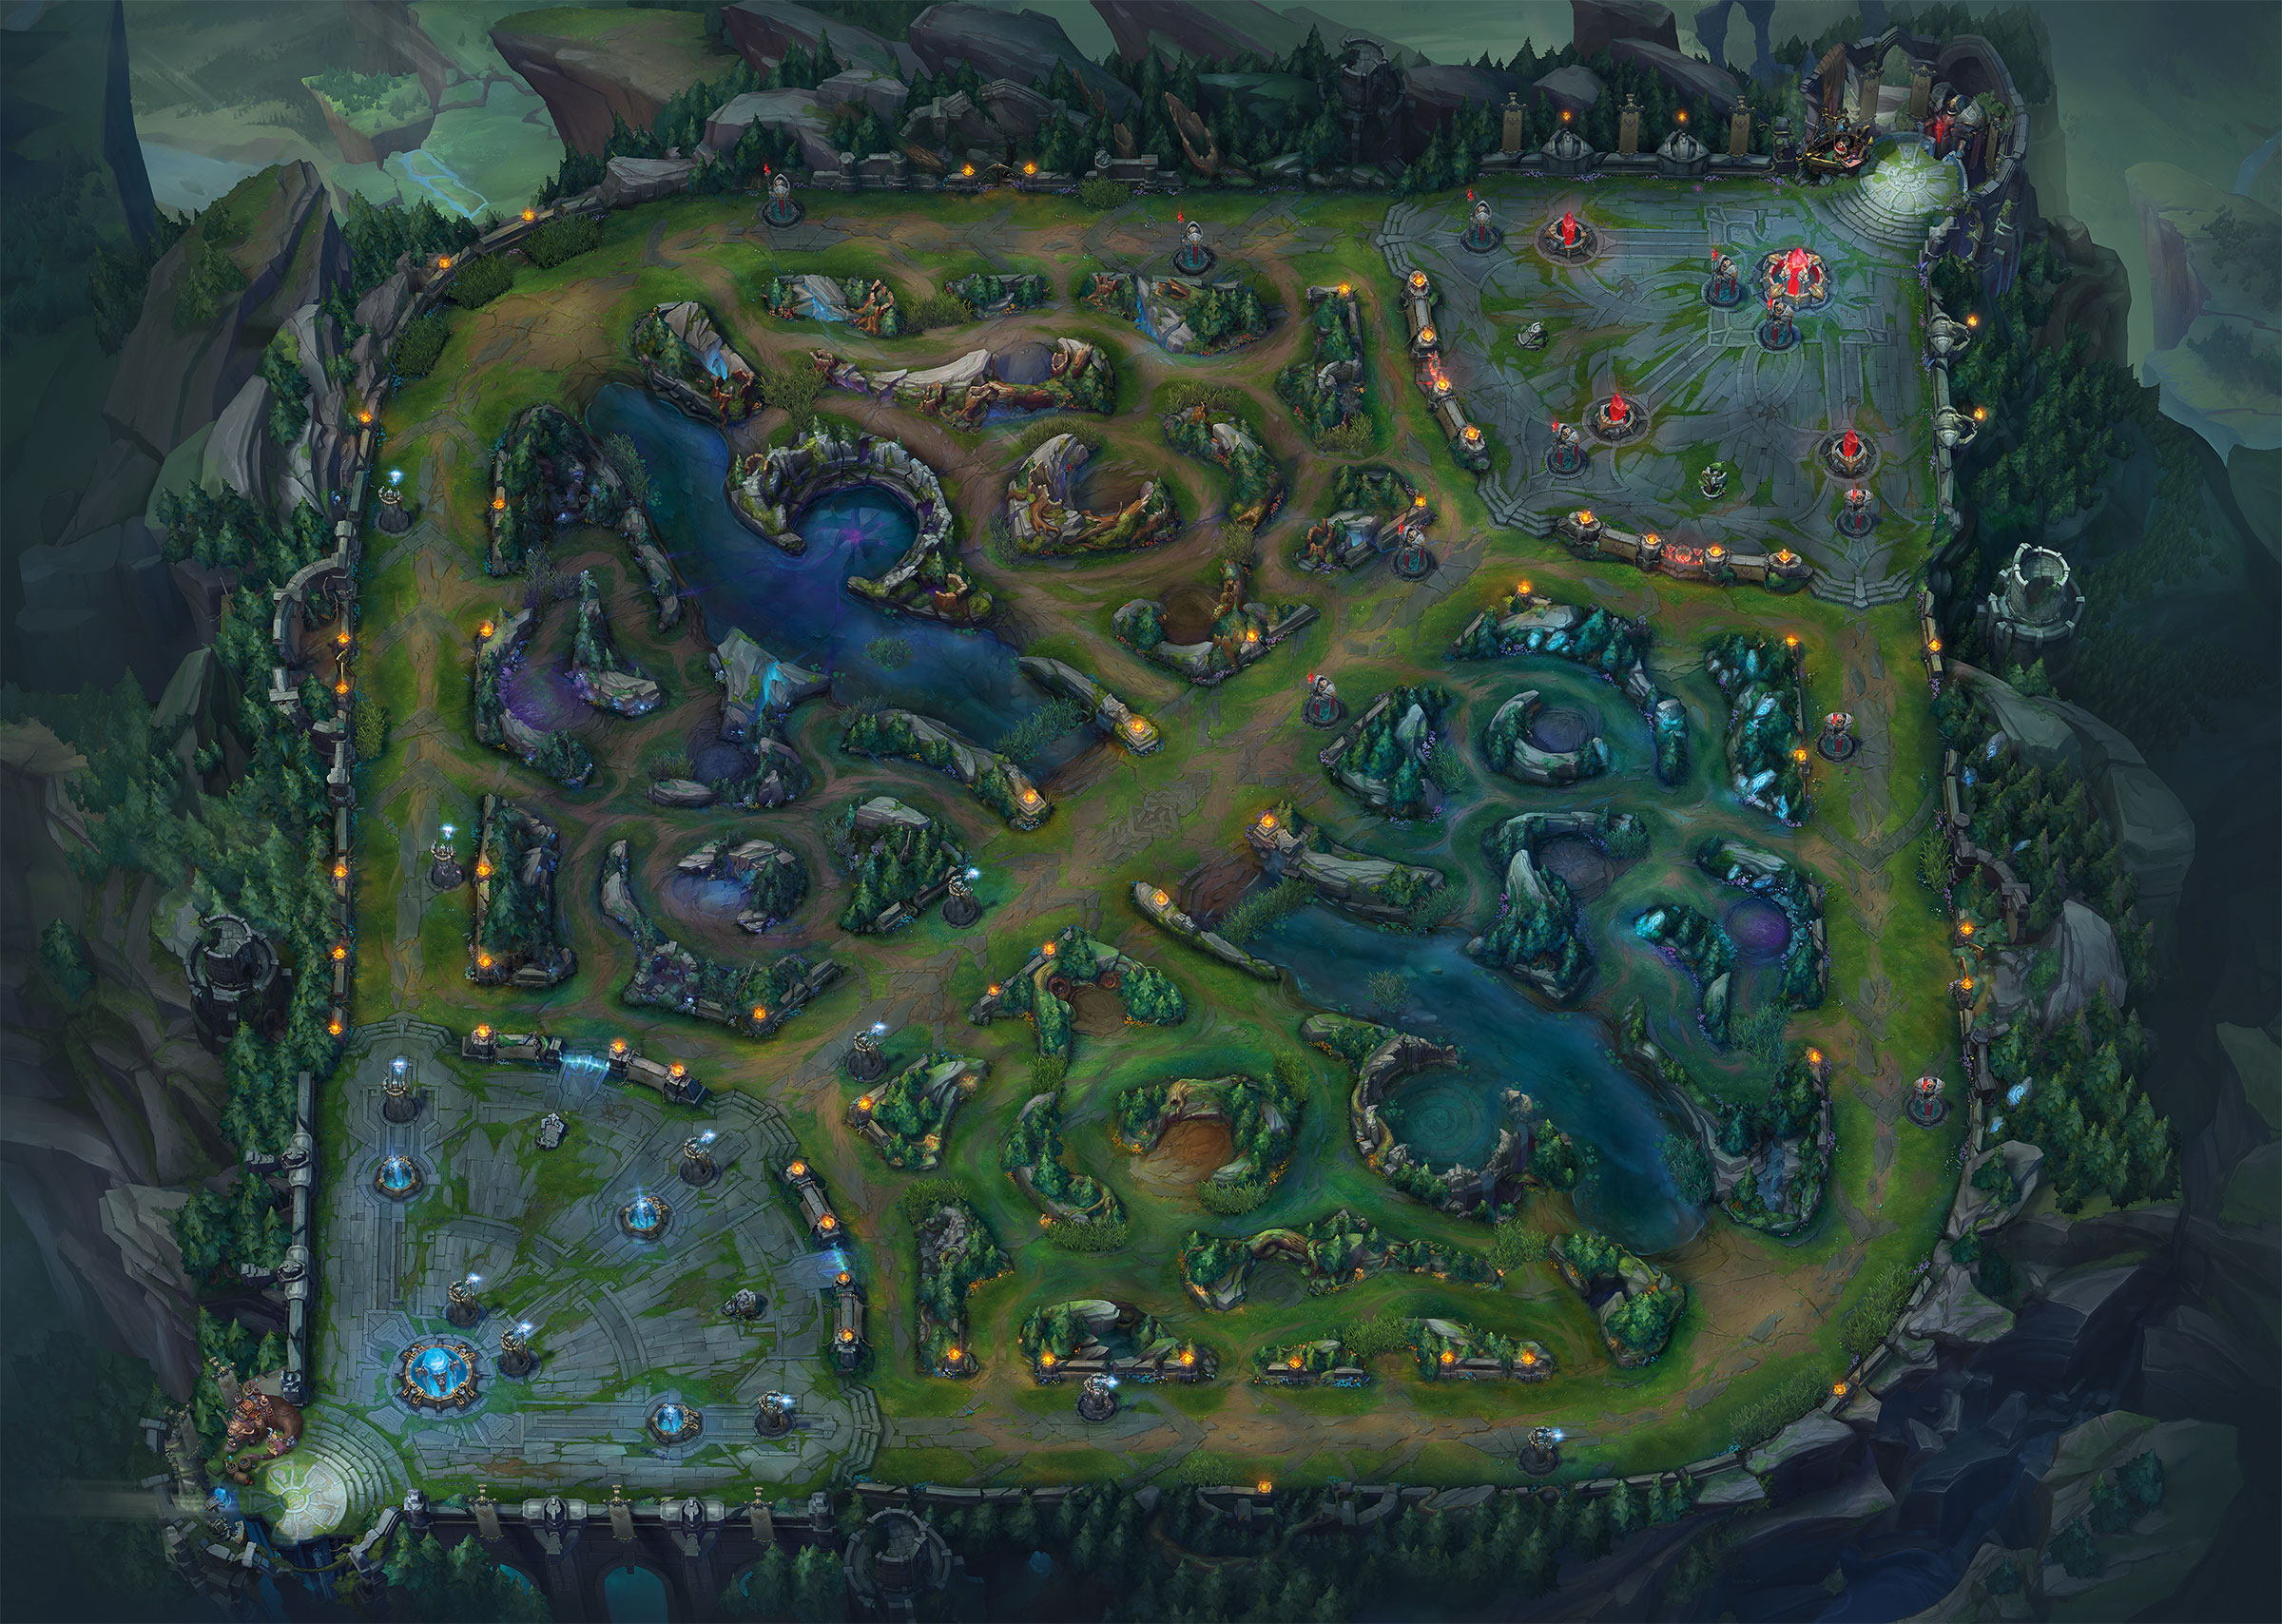
<br>
*The Summoners Rift*

# Cleaning the Data

,MatchId,ServerId,GameDuration,MapId,SeasonId,GameVersion,Blue_Won,Blue_FirstBlood,Blue_FirstTower,Blue_FirstInhib,Blue_FirstBaron,Blue_FirstDragon,Blue_FirstHerald,Blue_KillsTower,Blue_KillsInhib,Blue_KillsBaron,Blue_KillsDragon,Blue_KillsHerald,Purp_FirstInhib,Purp_FirstBaron,Purp_FirstHerald,Purp_KillsTower,Purp_KillsInhib,Purp_KillsBaron,Purp_KillsDragon,Purp_KillsHerald,player1_Id,player1_Kills,player1_Deaths,player1_Assists,player1_LrgstKillSpree,player1_LrgstMultiKill,player1_KillSprees,player1_LrgstTimeLiving,player1_TtlDmg,player1_TtlDmgChmp,player1_TtlHeal,player1_TtlDmgObj,player1_VisionScore,player1_TtlGold,player1_Minions,player1_Role,player1_Lane,player2_Id,player2_Kills,player2_Deaths,player2_Assists,player2_LrgstKillSpree,player2_LrgstMultiKill,player2_KillSprees,player2_LrgstTimeLiving,player2_TtlDmg,player2_TtlDmgChmp,player2_TtlHeal,player2_TtlDmgObj,player2_VisionScore,player2_TtlGold,player2_Minions,player2_Role,player2_Lane,player3_Id,player3_Kills,player3_Deaths,player3_Assists,player3_LrgstKillSpree,player3_LrgstMultiKill,player3_KillSprees,player3_LrgstTimeLiving,player3_TtlDmg,player3_TtlDmgChmp,player3_TtlHeal,player3_TtlDmgObj,player3_VisionScore,player3_TtlGold,player3_Minions,player3_Role,player3_Lane,player4_Id,player4_Kills,player4_Deaths,player4_Assists,player4_LrgstKillSpree,player4_LrgstMultiKill,player4_KillSprees,player4_LrgstTimeLiving,player4_TtlDmg,player4_TtlDmgChmp,player4_TtlHeal,player4_TtlDmgObj,player4_VisionScore,player4_TtlGold,player4_Minions,player4_Role,player4_Lane,player5_Id,player5_Kills,player5_Deaths,player5_Assists,player5_LrgstKillSpree,player5_LrgstMultiKill,player5_KillSprees,player5_LrgstTimeLiving,player5_TtlDmg,player5_TtlDmgChmp,player5_TtlHeal,player5_TtlDmgObj,player5_VisionScore,player5_TtlGold,player5_Minions,player5_Role,player5_Lane,player6_Id,player6_Kills,player6_Deaths,player6_Assists,player6_LrgstKillSpree,player6_LrgstMultiKill,player6_KillSprees,player6_LrgstTimeLiving,player6_TtlDmg,player6_TtlDmgChmp,player6_TtlHeal,player6_TtlDmgObj,player6_VisionScore,player6_TtlGold,player6_Minions,player6_Role,player6_Lane,player7_Id,player7_Kills,player7_Deaths,player7_Assists,player7_LrgstKillSpree,player7_LrgstMultiKill,player7_KillSprees,player7_LrgstTimeLiving,player7_TtlDmg,player7_TtlDmgChmp,player7_TtlHeal,player7_TtlDmgObj,player7_VisionScore,player7_TtlGold,player7_Minions,player7_Role,player7_Lane,player8_Id,player8_Kills,player8_Deaths,player8_Assists,player8_LrgstKillSpree,player8_LrgstMultiKill,player8_KillSprees,player8_LrgstTimeLiving,player8_TtlDmg,player8_TtlDmgChmp,player8_TtlHeal,player8_TtlDmgObj,player8_VisionScore,player8_TtlGold,player8_Minions,player8_Role,player8_Lane,player9_Id,player9_Kills,player9_Deaths,player9_Assists,player9_LrgstKillSpree,player9_LrgstMultiKill,player9_KillSprees,player9_LrgstTimeLiving,player9_TtlDmg,player9_TtlDmgChmp,player9_TtlHeal,player9_TtlDmgObj,player9_VisionScore,player9_TtlGold,player9_Minions,player9_Role,player9_Lane,player10_Id,player10_Kills,player10_Deaths,player10_Assists,player10_LrgstKillSpree,player10_LrgstMultiKill,player10_KillSprees,player10_LrgstTimeLiving,player10_TtlDmg,player10_TtlDmgChmp,player10_TtlHeal,player10_TtlDmgObj,player10_VisionScore,player10_TtlGold,player10_Minions,player10_Role,player10_Lane
0,2477731072,EUN1,2125,11,13,10.10.320.3039,Fail,False,False,False,False,True,False,2,0,0,2,0,True,True,True,7,2,1,2,1,1,3,12,10,0,1,0,393,140944,18254,11963,2902,5,10806,144,SOLO,TOP,2,0,7,19,0,0,0,484,37023,8736,2711,284,24,8555,53,DUO_SUPPORT,BOTTOM,3,8,8,6,4,3,2,562,232928,20776,19912,16785,23,14435,64,NONE,JUNGLE,4,18,4,3,7,2,5,753,165171,27615,11692,6265,36,17710,239,SOLO,MIDDLE,5,7,12,10,2,2,1,381,134573,20837,2969,2950,15,12749,170,DUO_CARRY,BOTTOM,6,6,5,14,2,1,1,758,212875,18801,16967,35951,38,12842,37,NONE,JUNGLE,7,12,10,7,2,1,2,406,146616,27376,1802,6178,24,14305,191,SOLO,MIDDLE,8,3,4,24,0,1,0,1445,12424,8120,24580,1591,21,10633,5,DUO_SUPPORT,BOTTOM,9,13,10,7,5,2,2,534,249551


Palette:


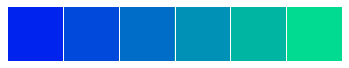

In [1]:
import numpy as np
import pandas as pd
import easydatascience as eds
import os

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting options
plt.style.use('seaborn')
sns.set_palette('winter')
sns.palplot(sns.color_palette())

match_columns = ['MatchId', 'ServerId', 'GameDuration', 'MapId', 'SeasonId',
                 'GameVersion']

team_columns = ['Blue_Won', 'Blue_FirstBlood', 'Blue_FirstTower', 'Blue_FirstInhib',
                'Blue_FirstBaron', 'Blue_FirstDragon', 'Blue_FirstHerald', 
                'Blue_KillsTower', 'Blue_KillsInhib', 'Blue_KillsBaron', 
                'Blue_KillsDragon', 'Blue_KillsHerald', 'Purp_FirstInhib', 
                'Purp_FirstBaron', 'Purp_FirstHerald', 'Purp_KillsTower', 
                'Purp_KillsInhib', 'Purp_KillsBaron', 'Purp_KillsDragon', 
                'Purp_KillsHerald']

base_player_columns = ['Id', 'Kills', 'Deaths', 'Assists', 'LrgstKillSpree', 
                       'LrgstMultiKill', 'KillSprees', 'LrgstTimeLiving', 'TtlDmg', 
                       'TtlDmgChmp', 'TtlHeal', 'TtlDmgObj', 'VisionScore', 
                       'TtlGold', 'Minions', 'Role', 'Lane']
player_columns = []

for i in range(1, 11):
    curr_player = 'player' + str(i)
    curr_list = [curr_player + '_' + col for col in base_player_columns]
    player_columns += curr_list
    
column_names = match_columns + team_columns + player_columns

datas = []
csvs = [i for i in os.listdir() if i[-4:]=='.csv']

for csv in csvs:
    datas.append(pd.read_csv(csv, names=column_names))
    
data = pd.concat(datas)
    
pd.set_option('max_columns', data.shape[0])
display(data.head())

print('\nPalette:')

&emsp;Most of the match-defining columns are there only for the debugging of the scraper.
Also, season id is the serial number of the current season but probably including
alfa and beta versions and thus, season 10 appears to be season 13 but that is not
the case. We can easily overcome this by looking at the game version, the first two
numbers are the current season and the second 2 are the current game patch. We
are going to leave that for now for EDA but I don't think we are going to need that
for the learning algorithms.

In [2]:
data = data.drop(['MatchId', 'ServerId', 'MapId', 'SeasonId'], axis=1)
data['GameVersion'] = data['GameVersion'].str[:5]

# Replacing win condition with bool values
data['Blue_Won'] = np.where(data['Blue_Won']=='Fail', 0, 1)

# Replacing bools with binary
data = data.replace([True, False], [1, 0])

# Roles can be reduced to a single column
roles = [['SOLO TOP', 'Top'], ['DUO TOP', 'Top'], ['NONE JUNGLE', 'Jungle'],
         ['SOLO MIDDLE', 'Mid'], ['DUO MIDDLE', 'Mid'], ['DUO_CARRY MIDDLE', 'Mid'],
         ['DUO_CARRY BOTTOM', 'Adc'], ['DUO_CARRY NONE', 'Adc'], ['DUO NONE', 'Adc'],
         ['DUO_CARRY TOP', 'Adc'], ['SOLO BOTTOM', 'Adc'],
         ['DUO BOTTOM', 'Adc'], ['DUO_SUPPORT BOTTOM', 'Support'], 
         ['DUO_SUPPORT MIDDLE', 'Support'], ['DUO_SUPPORT TOP', 'Support'],
         ['DUO_SUPPORT NONE', 'Support']]

# I terating over players
for player in range(1, 11):
    col_role, col_lane = ['player'+str(player)+'_'+i for i in ['Role', 'Lane']]
    data['dummie'] = data[col_role] + ' ' + data[col_lane]
    
    #Iterating over role replacement
    for dummie, role in roles:
        data[col_role] = np.where(data['dummie']==dummie, role, data[col_role])
        
    data = data.drop(['dummie', col_lane], axis=1)
    
# Drop player Ids
data = data.drop(['player'+str(i)+'_Id' for i in range(1, 11)], axis=1)

&emsp;There are a lot of outliers regarding the game's classification of player's lanes and roles. The cause of this is the rotations around the map players make during the game. For example, some support players tend to also play around mid lane which in return, classifies them here as duo mid lane. Another example is a tactic where Top and Bot laners switch lanes when the first tower falls so Adc and Support are sometimes classified as Top laners.
<br><br>
&emsp;Even though I might have not dealt with the outliers 100% correctly, most of the mistakes I made are probably related to the lane of the players and not the role which is not that critical since the role is much more important.

In [3]:
data = data.loc[data['GameVersion'].str[:2]=='10']

&emsp;Another very important thing to point out is the big dragon changes that have impacted the game and now it is not possible for a team to kill more than 4 dragons (excluding the Elder dragon) and that makes the games from other seasons outliers. Also, having 4 dragons gives a team a huge buff that can greatly influence the outcome of the game, and having more than those 4 drakes could put a lot more weight on dragon-related features where it is not supposed to.
<br><br>
&emsp;With that said, we are going to focus on season 10 exclusively.

# Individual Feature exploration

In [4]:
pd.set_option('max_rows', data.shape[0])
display(eds.look(data.iloc[:, :37]))
pd.set_option('max_rows', 60)

,Types,Counts,Distincts,Nulls,Missing ratio (%),Uniques,Skewness
GameDuration,int64,44711,2249,0,0.0,"[[2125, 1910, 1647, 2179, 1830, 1380, 1981, 13...",0.229339
GameVersion,object,44711,10,0,0.0,"[[10.10, 10.9., 10.8., 10.7., 10.6., 10.3., 10...",NaN
Blue_Won,int64,44711,2,0,0.0,"[[0, 1]]",0.038612
Blue_FirstBlood,int64,44711,2,0,0.0,"[[0, 1]]",-0.024292
Blue_FirstTower,int64,44711,2,0,0.0,"[[0, 1]]",-0.026171
Blue_FirstInhib,int64,44711,2,0,0.0,"[[0, 1]]",0.275402
Blue_FirstBaron,int64,44711,2,0,0.0,"[[0, 1]]",0.881439
Blue_FirstDragon,int64,44711,2,0,0.0,"[[1, 0]]",0.051505
Blue_FirstHerald,int64,44711,2,0,0.0,"[[0, 1]]",0.159080
Blue_KillsTower,int64,44711,12,0,0.0,"[[2, 4, 11, 3, 7, 0, 1, 6, 8, 9, 10, 5]]",0.048698


### Game Duration

---------------------
Spread:
---------------------


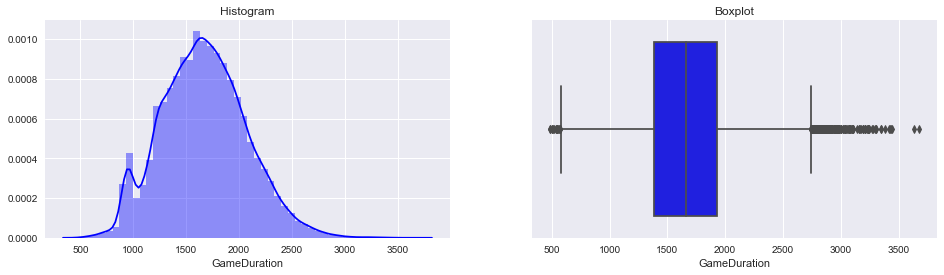


Skew:  0.2293
Mean:  1668.5662
Standard Deviation:  399.3653

Amount trimmed:  483

---------------------
Spread after trimming:
---------------------


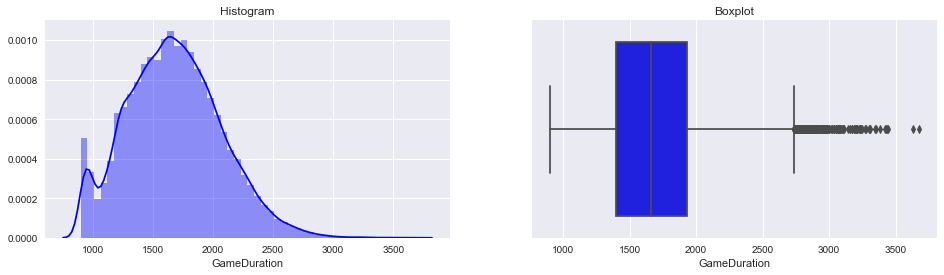


Skew:  0.3082
Mean:  1678.3078
Standard Deviation:  390.326


In [5]:
print('---------------------\nSpread:\n---------------------')
eds.plot_spread(data['GameDuration'])

data_rows = data.shape[0]
trimmed_duration = data.loc[data['GameDuration']<900]

data = data.loc[data['GameDuration']>=900].reset_index(drop=True)
print('\nAmount trimmed: ', data_rows-data.shape[0])

print('\n---------------------\nSpread after trimming:\n---------------------')
eds.plot_spread(data['GameDuration'])

&emsp;Very strange. As far as I know, it is impossible to end a Summoner's Rift Normal game of League of Legends between 5th and 15th minute and yet, there were 483 games of that kind.

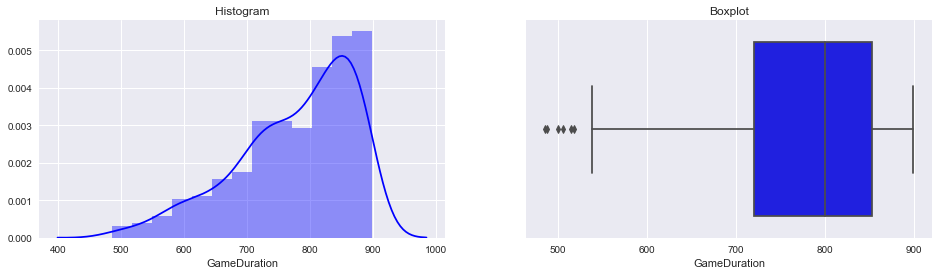


Skew:  -0.8472
Mean:  776.5383
Standard Deviation:  93.4768


In [6]:
eds.plot_spread(trimmed_duration['GameDuration'])

&emsp;The 4th quartile and some values above the 500 seconds mark could be explained as a software error but I don't have anything that could confirm that theory so it is going to stay just a theory. Nevertheless, the amount trimmed is not that significant so we can afford to overlook it, for now.

### Blue Won

In [7]:
eds.group_by(data, 'Blue_Won')

#Hypothesis testing of geting proportion that varies this much
# + winning by game version

Blue_Won
0    0.510242
1    0.489758
Name: Blue_Won, dtype: float64


&emsp;Doing a hypothesis test with a significance level of 0.05 with the null-hypothesis being that both teams have an equal chance of winning gives us a z-score of 4.23 and a p-value of 0.000012. That means that, at least in season 10, the purple team was more favorable to win a game by a margin of around 1%. This is especially strange given that the blue side always had an advantage, mainly because the passive top lane could play even more passive on the blue side because of the map layout. 
<br><br>
I can assume 2 things that could be the cause of this:
<br><br>
&emsp;1. Jungle changes are now forcing Junglers not to assists the lane as much because they can lag behind more easily which in return, relives the top lane of the purple side of some pressure.
<br><br>
&emsp;2. The Dragon pit is facing purple side and that gives that side more options when it comes to taking the dragon (we still haven't statistically proven that dragons are significant to the outcome of the game so we are going to just assume it before we support the theory with data)

###  Game Version
Blue and Purple side win rate by version (patch)

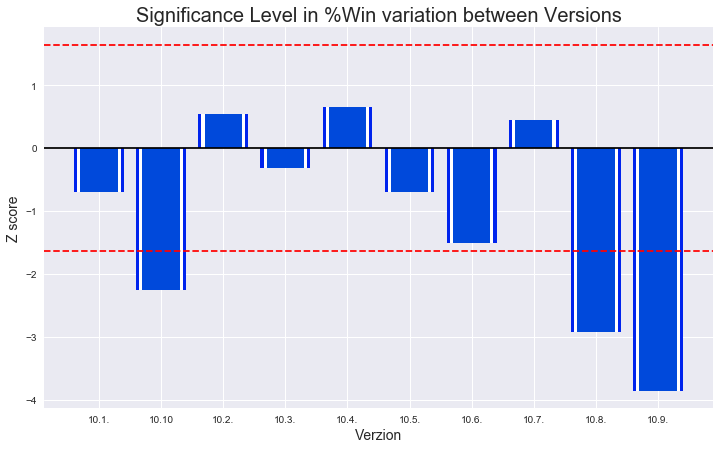

In [8]:
# Grouping by game version

win_pct = list(data.groupby('GameVersion')['Blue_Won'].mean())
win_count = list(data.groupby('GameVersion')['Blue_Won'].count())
ver_idx = list(data.groupby('GameVersion')['Blue_Won'].count().index)

z_vals = []
for pct, size in zip(win_pct, win_count):
    z_vals.append((pct - 0.5) / np.sqrt(0.25 / size))
    
fig, ax = plt.subplots(figsize=(12, 7))

ax.bar(ver_idx, z_vals)
ax.bar(ver_idx, z_vals, width=0.7, color='w')
ax.bar(ver_idx, z_vals, width=0.6)
ax.set_xlabel('Verzion', fontsize=14)
ax.set_ylabel('Z score', fontsize=14)
ax.set_title('Significance Level in %Win variation between Versions', fontsize=20)

ax.axhline(0, color='k')
ax.axhline(1.64485, color='r', linestyle='--')
ax.axhline(-1.64485, color='r', linestyle='--');

In [9]:
# Significant values
sig_idx = [ver_idx[i] for i in [1, -2, -1]]
sig_pct = [win_pct[i] for i in [1, -2, -1]]

for idx, pct in zip(sig_idx, sig_pct):
    print(idx+':', round(pct, 4))

10.10: 0.4676
10.8.: 0.4848
10.9.: 0.4842


&emsp;The only thing I could find that could explain the win rate behaviour are the changes that patch 10.8 introduced, giving Junglers an option to stay more passive and get more rewarded if doing so. That is neat since it doesn't contradict the previous 2 assumptions we made and in fact, it supports them.
<br><br>
Per patch notes:
<br><br>
&emsp;"*Junglers are appropriately influential as a role, but we want to reduce the perception that they have to have an aggressive early presence to be effective. Instead, we're giving them opportunities for more personal power through proper farming as the game progresses.*"
<br><br>
&emsp;__NOTE:__ I would like to make it clear how am I going to approach this problem from now on. League of Legends is a game that is known for its constant updates and that poses a big problem to how I might decide to approach the problem. As we could see, the game before the patch 10.8 and after it is "significantly" different and if I decide to use all the data, it might not wind up well based on what my goal is:
<br><br>
1.I can trim the games that belong to pre 10.8 patches and focus on the current meta.
<br>
2.I can leave the data as it is and focus on generalizing the predictive model.
<br><br>
&emsp;I am going to choose option 2 since that was the initial idea and with that, leave out the version column from further analysis. Even though that might relieve me from doing the extra work I'd need to do in order to analyze the game from patch to patch, now I have to be extra careful to properly generalize the model.

In [10]:
data = data.drop(['GameVersion'], axis=1)

### Boolean Team Values

In [11]:
bool_teams = data[[i for i in data if (i[:6]=='Blue_F' or i[:6]=='Purp_F')]]
blue_exclusive = ['Blue_First'+i for i in ['Blood', 'Tower', 'Dragon']]

for col in bool_teams[blue_exclusive]:
    print('---------------------')
    eds.group_by(bool_teams, col)
    print('---------------------\n')

---------------------
Blue_FirstBlood
1    0.50563
0    0.49437
Name: Blue_FirstBlood, dtype: float64
---------------------

---------------------
Blue_FirstTower
1    0.50615
0    0.49385
Name: Blue_FirstTower, dtype: float64
---------------------

---------------------
Blue_FirstDragon
0    0.512029
1    0.487971
Name: Blue_FirstDragon, dtype: float64
---------------------



&emsp;You might have noticed that the Blue team has 3 more features. That is because these 3 events always happen and there is no reason to have the same feature for both teams (degrees of freedom). Hypothesis testing shows that all 3 of these results are significant.
<br><br>
&emsp;The aggressive blue team is more likely to take the first tower or kill, but the purple team has the upper hand when it comes to the first dragon which confirms our second assumption about the unequal win percentage between the two sides.

In [12]:
cols = ['Inhib', 'Baron', 'Herald']
blues = ['Blue_First'+i for i in cols]
purps = ['Purp_First'+i for i in cols]

for blue, purp in zip(blues, purps):
            
    curr_data = bool_teams[[blue, purp]]
    lght1 = curr_data.shape[0]
            
    curr_data = curr_data.loc[(curr_data[blue]==1)|(curr_data[purp]==1)]
    lght2 = curr_data.shape[0]
    
    print('---------------------')
    print('Games trimmed:', lght1-lght2, '(' + str(round((lght1-lght2)/lght1, 4)*100) + '%)')
            
    eds.group_by(curr_data, blue)
    print('---------------------\n')

---------------------
Games trimmed: 6011 (13.59%)
Blue_FirstInhib
0    0.501714
1    0.498286
Name: Blue_FirstInhib, dtype: float64
---------------------

---------------------
Games trimmed: 15467 (34.97%)
Blue_FirstBaron
0    0.536177
1    0.463823
Name: Blue_FirstBaron, dtype: float64
---------------------

---------------------
Games trimmed: 5134 (11.61%)
Blue_FirstHerald
1    0.521589
0    0.478411
Name: Blue_FirstHerald, dtype: float64
---------------------



&emsp;In the game, these events might not happen because the game is too short (a team surrenders), or as it is the case with the herald, it is not a priority to pursuit. Trimming the games where neither of the events has happened, gives us the following results. The first inhibitor proportion is insignificant with the p-value of 0.25 and as the red team has the upper hand with the dragon pit, the same can be said for the blue team when it comes to baron/herald pit. That gives the blue team an advantage when it comes to taking the herald but not when it comes to the baron.
<br><br>
&emsp;The reason behind this is that a team is less likely to take baron if it is already loosing so the feature is biased towards the purple team.

### Numeric Team Values


---------------------
 Blue_KillsTower 
---------------------


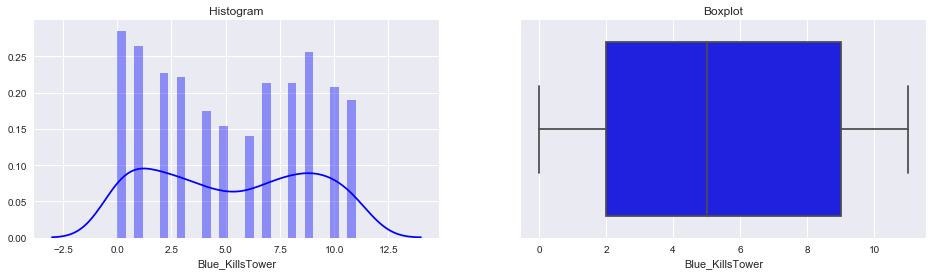


Skew:  0.0472
Mean:  5.2453
Standard Deviation:  3.6181

---------------------
 Purp_KillsTower 
---------------------


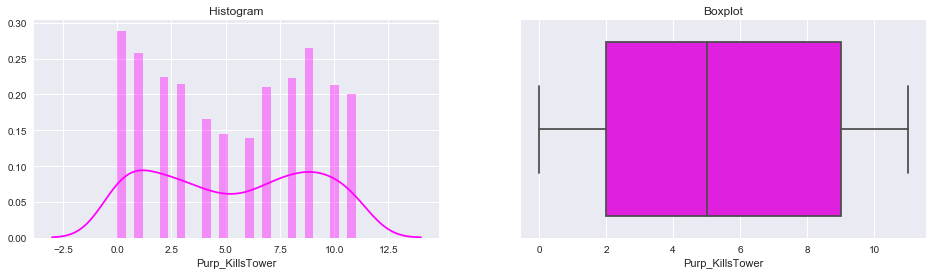


Skew:  0.0132
Mean:  5.3187
Standard Deviation:  3.6481

---------------------
 Blue_KillsInhib 
---------------------


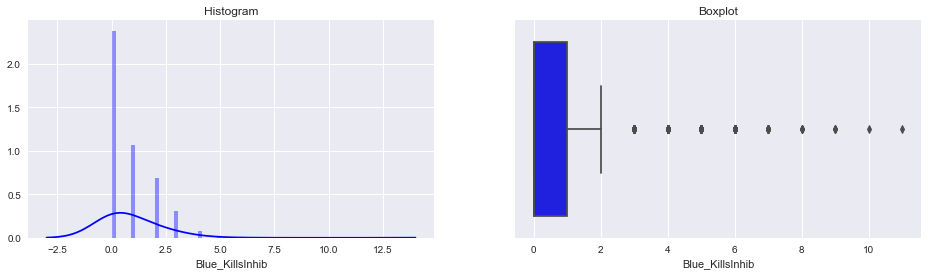


Skew:  1.3987
Mean:  0.8423
Standard Deviation:  1.0989

---------------------
 Purp_KillsInhib 
---------------------


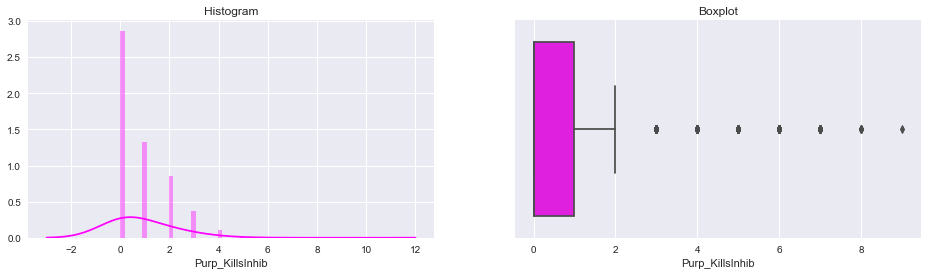


Skew:  1.3647
Mean:  0.8604
Standard Deviation:  1.1096

---------------------
 Blue_KillsBaron 
---------------------


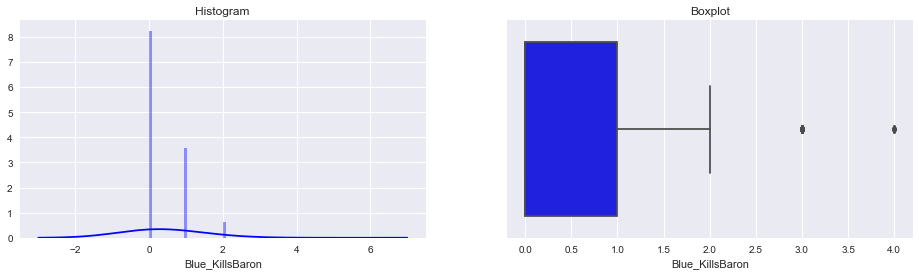


Skew:  1.3424
Mean:  0.3973
Standard Deviation:  0.6002

---------------------
 Purp_KillsBaron 
---------------------


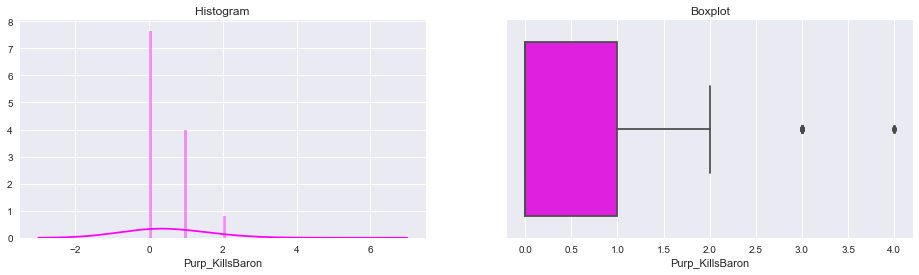


Skew:  1.1788
Mean:  0.4627
Standard Deviation:  0.6389

---------------------
 Blue_KillsDragon 
---------------------


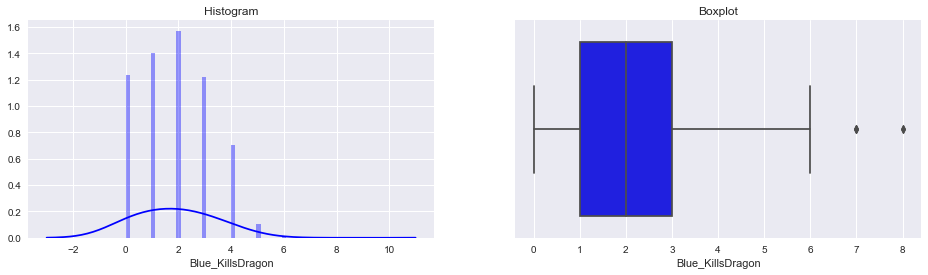


Skew:  0.2465
Mean:  1.8523
Standard Deviation:  1.3437

---------------------
 Purp_KillsDragon 
---------------------


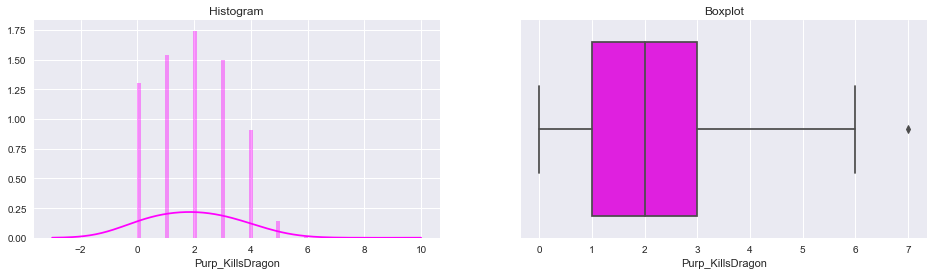


Skew:  0.1766
Mean:  1.9479
Standard Deviation:  1.3629

---------------------
 Blue_KillsHerald 
---------------------


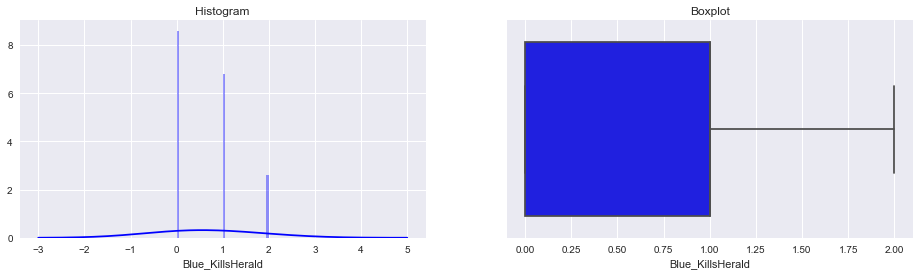


Skew:  0.5866
Mean:  0.6677
Standard Deviation:  0.7157

---------------------
 Purp_KillsHerald 
---------------------


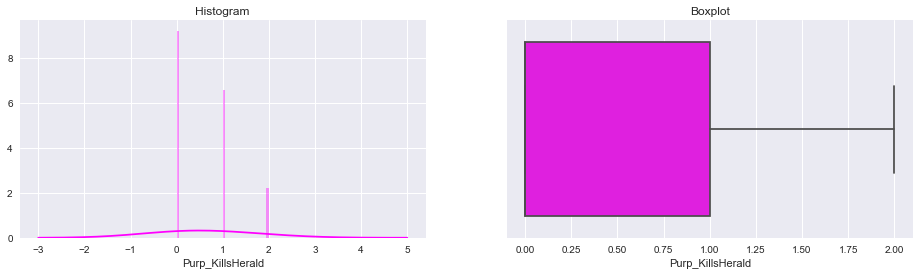


Skew:  0.6943
Mean:  0.6125
Standard Deviation:  0.6965


In [13]:
# For easier data navigation
num_teams = data[[i for i in data if (i[:6]=='Blue_K' or i[:6]=='Purp_K')]]
num_teams_pairs = list(zip(num_teams.columns[:5], num_teams.columns[5:]))

for blue, purp in num_teams_pairs:
    print('\n---------------------\n', blue, '\n---------------------')
    eds.plot_spread(num_teams[blue])
    print('\n---------------------\n', purp, '\n---------------------')
    eds.plot_spread(num_teams[purp], color='magenta')

&emsp;The numbers are confirming the previous advantage assumptions so we are not going to dive any deeper into that. The thing I want to address is the outliers, the distribution of tower kills and the dragon kills feature. I left out a very important topic and that is that after the 4th dragon of a team is killed, every next dragon is the elder dragon with its own special buff (like baron). That is why it is possible for a team to kill more than 4 dragons in a game.
<br><br>
&emsp;You might notice the unusual distribution of tower kills. The only reasonable explanation I could come to is that the team surrenders when it is losing by a margin and that is why the frequency starts dropping, but then it starts rising at 6 again. If a team decides not to surrender and thus, play till the end, the enemy team would have to take down at least 3 base towers to finish the game (1 inhib tower and 2 nexus towers). It is strange if I say it like this but it helps to visualize what it really is if we imagine a normal distribution that has been added to out right-tailed one. Other than that, other distributions are either have normal or right-tailed distribution

In [14]:
# Outliers
lght1 = data.shape[0]

data = data.loc[(data['Blue_KillsDragon']<7)&(data['Purp_KillsDragon']<7)&(data['Blue_KillsBaron']<3)&(data['Purp_KillsBaron']<3)&(data['Blue_KillsInhib']<5)&(data['Purp_KillsInhib']<5)]

print('Values trimmed:', lght1-data.shape[0], '\nNew lenght:', data.shape[0])

Values trimmed: 898 
New lenght: 43330


In [15]:
# Elder Dragons
for col in [i+'_KillsDragon' for i in ['Blue', 'Purp']]:
    col_name = col[:5] + 'KillsElder'
    data[col_name] = np.where(data[col]>4, data[col]-4, 0)
    
data.loc[(data['Blue_KillsDragon']==4)&(data['Purp_KillsDragon']==4)].iloc[:, -2:]

,Blue_KillsElder,Purp_KillsElder
13130,0,0
17348,0,0
18441,0,0
19385,0,0
24025,0,0


&emsp;I noticed that I made a mistake. It is not quite possible to deduct how many elder dragons a team has killed because for example, if a team kills 4 normal dragons and 1 elder dragon and the other team has 0 normal dragons but 2 elder dargons, it would still count as 5:2 dragon kills and 1:0 elder kills for team 1 and that is very wrong. We end up with a team that is already favored with their 4 dragon kills and then adding even more weight with the elder dragon kills.
<br><br>
(Up here is an example when both teams have 4 dragon kills. Clearly, both teams can't have 4 normal dragon kills so 1 of them must have 1 or more elder kills but we are not able to capture that)

In [16]:
data = data.drop(['Purp_KillsElder', 'Blue_KillsElder'], axis=1)

## Player Data

In [17]:
valid_roles = ['Adc', 'Jungle', 'Mid', 'Support', 'Top']

team1_okteams = []

team1 = data[['player'+str(i)+'_Role' for i in range(1, 6)]]
for idx, row in team1.iterrows():
    roles = list(row)
    roles.sort()
    if valid_roles == roles:
        team1_okteams.append(idx)
        
team2_okteams = []

team2 = data[['player'+str(i)+'_Role' for i in range(6, 11)]]
for idx, row in team2.iterrows():
    roles = list(row)
    roles.sort()
    if valid_roles == roles:
        team2_okteams.append(idx)
        
ok_games = [i for i in team1_okteams if i in team2_okteams]

print('Amount of games that have valid roles on both teams:', len(ok_games),
     '('+str(round((len(ok_games)/len(data))*100, 4))+'%)')

Amount of games that have valid roles on both teams: 22322 (51.5163%)


In [18]:
print('Team 1:')
display(data.iloc[2:3, 21:][list(team1)])
print('Team 2:')
display(data.iloc[2:3, 21:][list(team2)])

Team 1:


,player1_Role,player2_Role,player3_Role,player4_Role,player5_Role
2,Support,Top,Jungle,Adc,Top


Team 2:


,player6_Role,player7_Role,player8_Role,player9_Role,player10_Role
2,Mid,Support,Adc,Top,Jungle


&emsp;There is a mislabel of players' roles in more than 50% of the games which makes it a challenge to do apples to apples comparisons. The dataset I was planning to be one of the most important ones is not going to be in the first plan: Subtracting the 2 players' stats to reduce the features space.

### Player Features by Roles

In [19]:
# Getting player entries for each role
# Sorry for the messy and iterative code
# Explanation: We are iterating through every role and every player 1-10.
# We have to do it since every player can take on any role. So it is basically
# taking chunks of 14 entrances at the time (10x per game) and assigning 
# those snippets to the corresponding role in the roles list.

roles = [[role, list()] for role in valid_roles]

for iter in range(5):
    curr_role = roles[iter][0]
    curr_list = roles[iter][1]
    
    for player in range(1, 11):
        curr_data = data[[i for i in data.columns if (i[6:8]==str(player)+'_')|(i[6:8]==str(player))]]
        
        # Column Names
        if player == 10:
            curr_data.columns = [i[9:] for i in curr_data.columns]
        else:
            curr_data.columns = [i[8:] for i in curr_data.columns]

        curr_list.append(curr_data.loc[curr_data[curr_data.columns[-1]]==curr_role])
        
# Concating lists of datasets within the list
roles = [[x, pd.concat(y)] for x, y in roles]

# Check
#suma = 0
#for role, df in roles:
#    suma += df.shape[0]
    
#print(suma, '\n', data.shape[0]*10)

&emsp;I am going to stick to the more widely addressed features for now and I will focus on the other ones if I find that they are important for the learning algorithm.
<br><br>
&emsp;An outlier pattern appeared in the stats by players' roles data where the data is rightly skewed and that is the problem we didn't want to address if we didn't have to. I thought that it is going to start posing a problem only when I started building the models that are sensitive to outliers but it influences a lot more stuff. Here is where I decided I should trim the long games.
<br><br>
&emsp;Another intuitive point I want to make is that if the game lasts long there should intuitively be a 50% chance of both teams winning since the game is that close.

In [20]:
# Trimming the long games
q75, q25 = np.percentile(data['GameDuration'], [75, 25])
iqr = q75 - q25

lght1 = data.shape[0]

data = data.loc[data['GameDuration']<=q75+iqr*1.5].reset_index(drop=True)

print('Values trimmed:', lght1-data.shape[0], '\nNew lenght:', data.shape[0])

Values trimmed: 193 
New lenght: 43137


__NOTE__: The next section of plots that represent spread is dedicated to the people who want a deeper understanding of the game (e.g. Top, Mid and Adc tend to have more Minions, etc.) and to address the outliers. If you are familiar with the game you can ignore it.

---------------------
 ADC 
---------------------

 -----------------
 Kills 
 -----------------


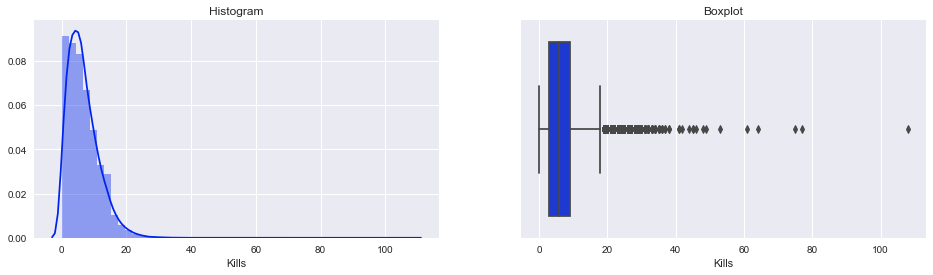


Skew:  1.3822
Mean:  6.6164
Standard Deviation:  4.7784

 -----------------
 Deaths 
 -----------------


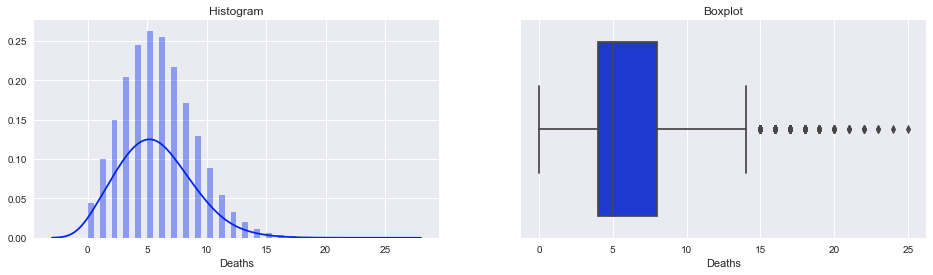


Skew:  0.5038
Mean:  5.6998
Standard Deviation:  3.0318

 -----------------
 Assists 
 -----------------


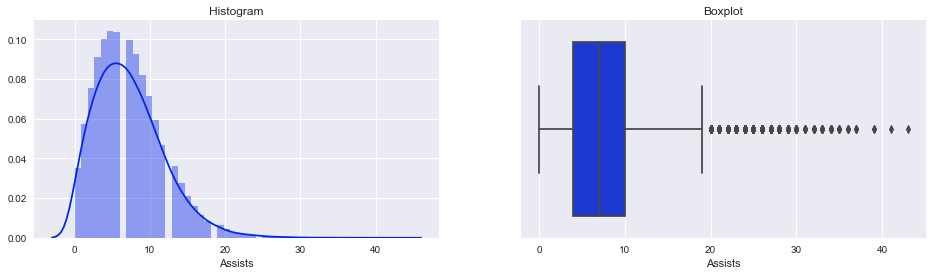


Skew:  0.9181
Mean:  7.2358
Standard Deviation:  4.5918

 -----------------
 TtlDmgChmp 
 -----------------


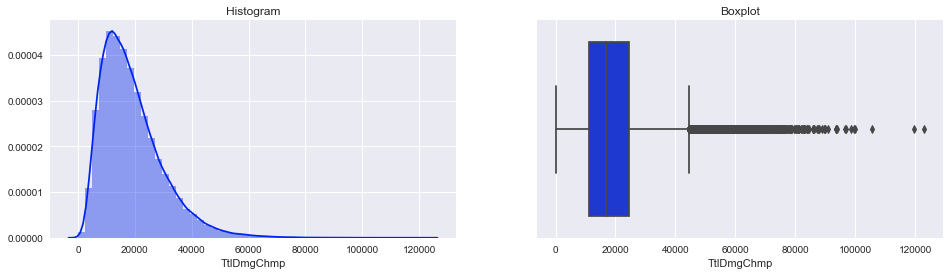


Skew:  1.3298
Mean:  18992.8106
Standard Deviation:  10874.0285

 -----------------
 VisionScore 
 -----------------


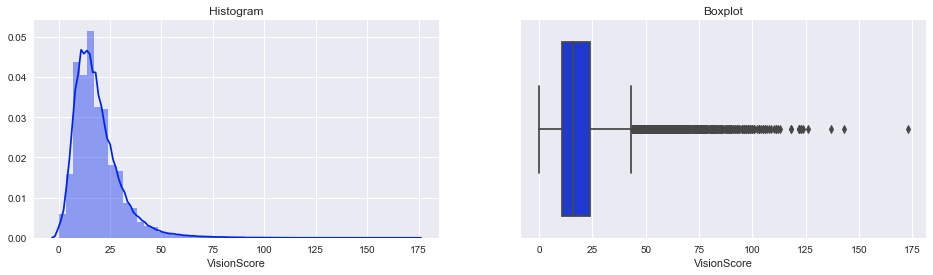


Skew:  1.8905
Mean:  18.7415
Standard Deviation:  11.49

 -----------------
 TtlGold 
 -----------------


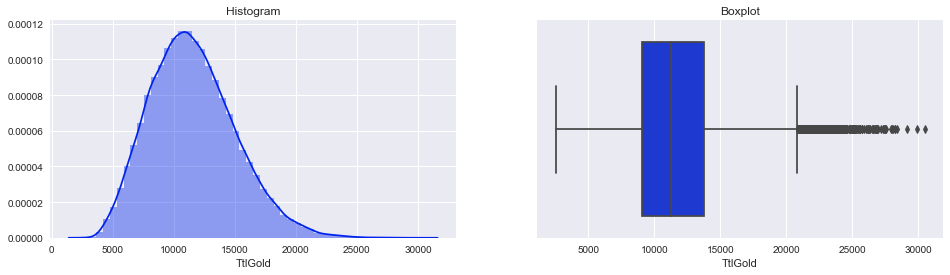


Skew:  0.4774
Mean:  11556.8441
Standard Deviation:  3478.4051

 -----------------
 Minions 
 -----------------


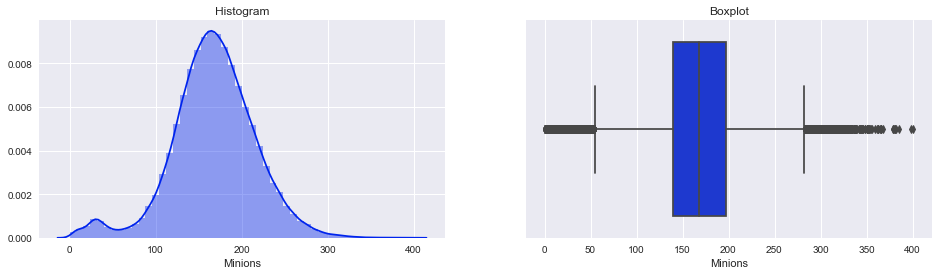


Skew:  -0.2952
Mean:  167.3692
Standard Deviation:  48.5246
---------------------
 JUNGLE 
---------------------

 -----------------
 Kills 
 -----------------


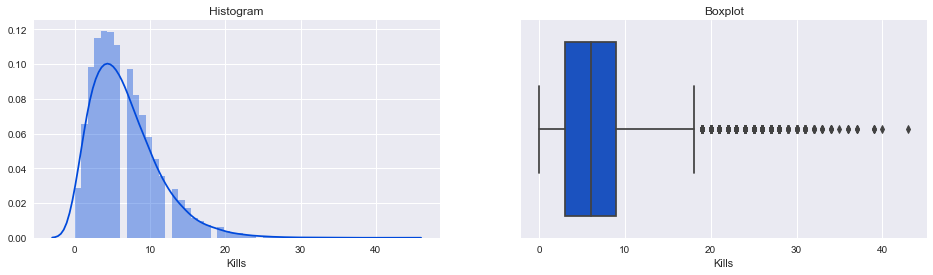


Skew:  1.1843
Mean:  6.6343
Standard Deviation:  4.4659

 -----------------
 Deaths 
 -----------------


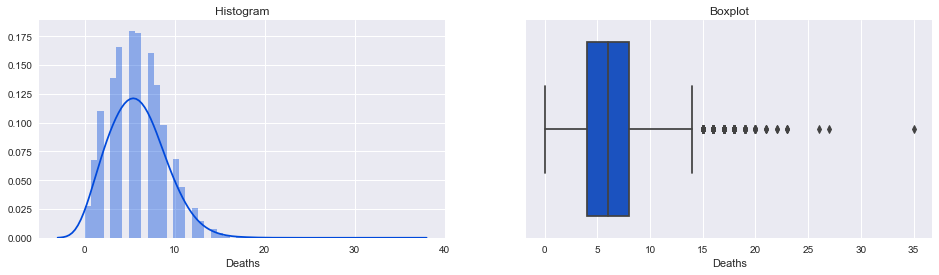


Skew:  0.4613
Mean:  5.828
Standard Deviation:  3.058

 -----------------
 Assists 
 -----------------


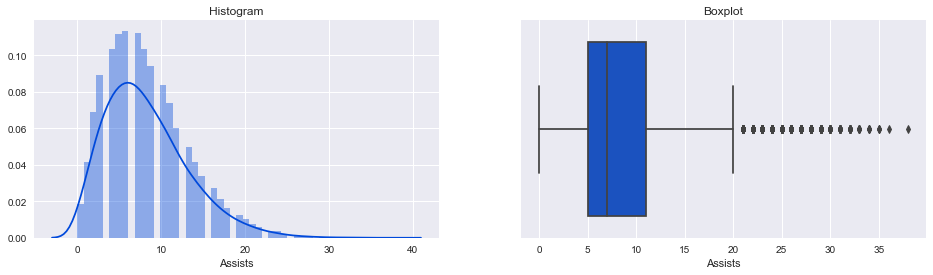


Skew:  0.8662
Mean:  8.2508
Standard Deviation:  4.9579

 -----------------
 TtlDmgChmp 
 -----------------


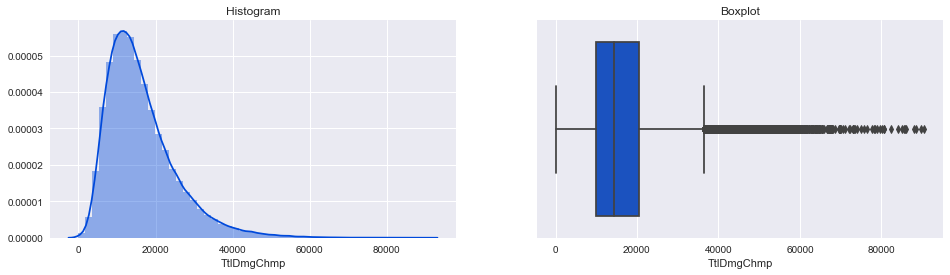


Skew:  1.4471
Mean:  16353.1236
Standard Deviation:  9018.7526

 -----------------
 VisionScore 
 -----------------


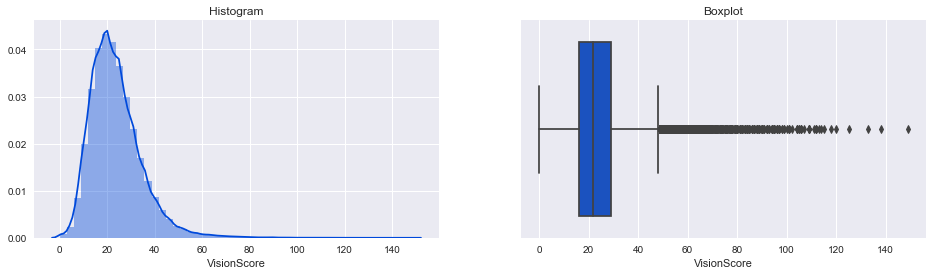


Skew:  1.4377
Mean:  23.657
Standard Deviation:  11.0155

 -----------------
 TtlGold 
 -----------------


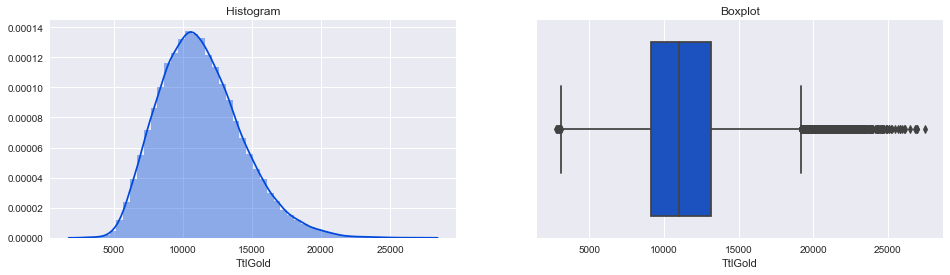


Skew:  0.5671
Mean:  11305.1102
Standard Deviation:  3004.7949

 -----------------
 Minions 
 -----------------


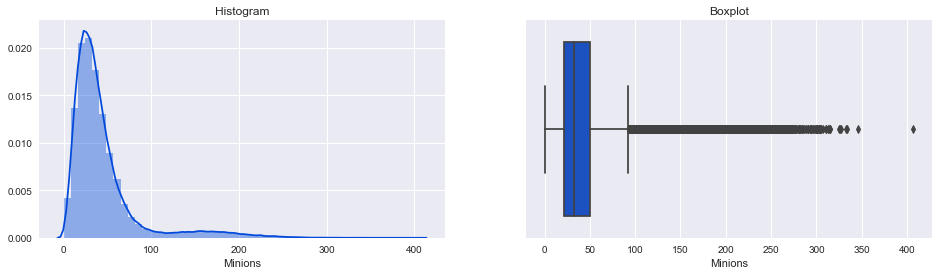


Skew:  2.6916
Mean:  44.433
Standard Deviation:  40.5821
---------------------
 MID 
---------------------

 -----------------
 Kills 
 -----------------


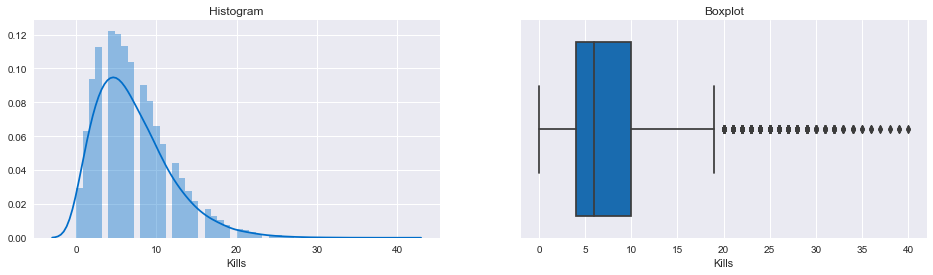


Skew:  1.1037
Mean:  7.069
Standard Deviation:  4.6872

 -----------------
 Deaths 
 -----------------


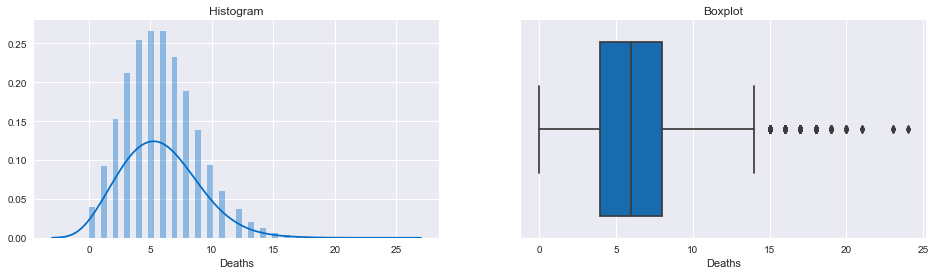


Skew:  0.5089
Mean:  5.8015
Standard Deviation:  3.0345

 -----------------
 Assists 
 -----------------


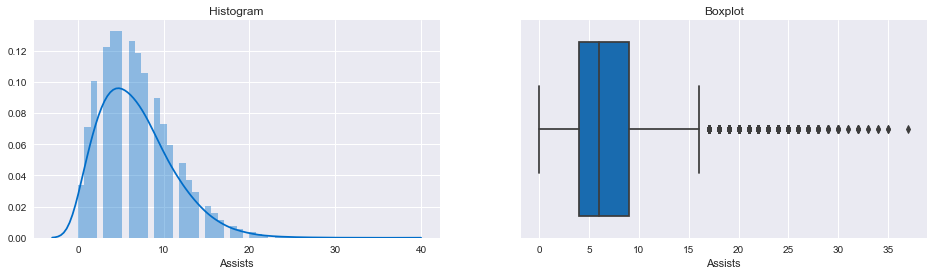


Skew:  0.8948
Mean:  6.7906
Standard Deviation:  4.2874

 -----------------
 TtlDmgChmp 
 -----------------


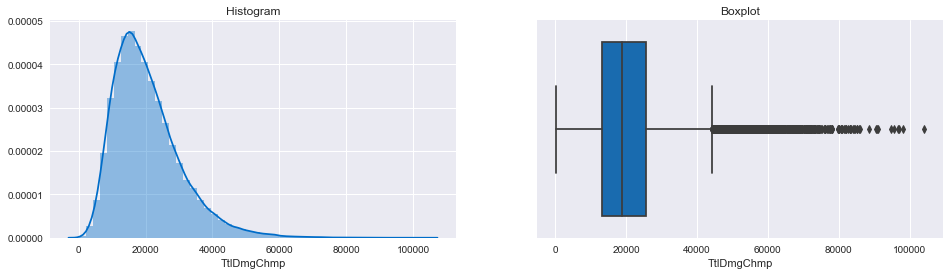


Skew:  1.2403
Mean:  20525.0001
Standard Deviation:  10148.5913

 -----------------
 VisionScore 
 -----------------


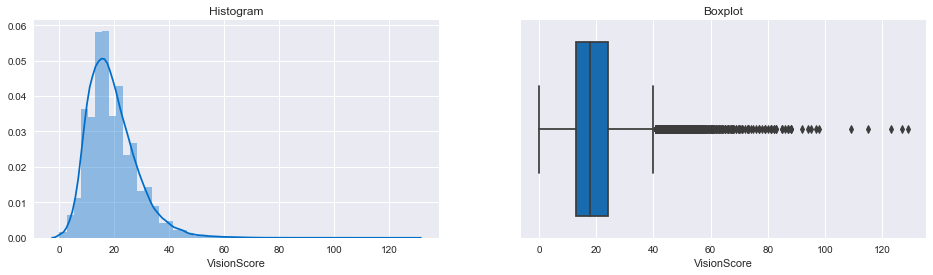


Skew:  1.2332
Mean:  19.2664
Standard Deviation:  9.0762

 -----------------
 TtlGold 
 -----------------


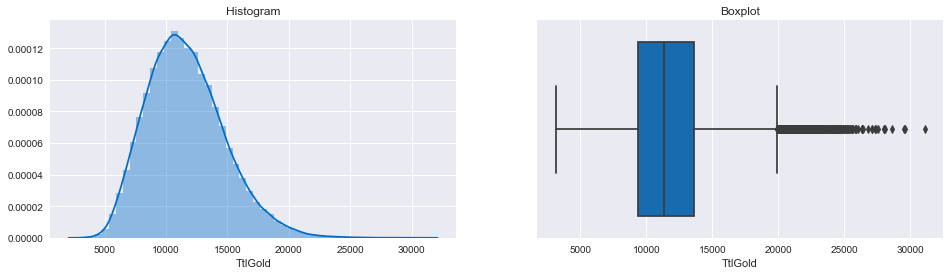


Skew:  0.5525
Mean:  11619.8542
Standard Deviation:  3144.2487

 -----------------
 Minions 
 -----------------


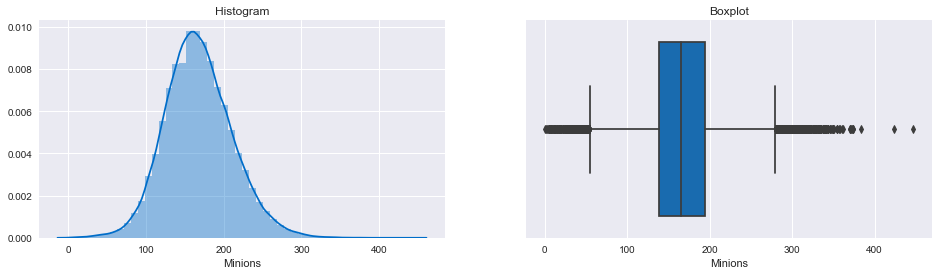


Skew:  0.2597
Mean:  167.6128
Standard Deviation:  43.2021
---------------------
 SUPPORT 
---------------------

 -----------------
 Kills 
 -----------------


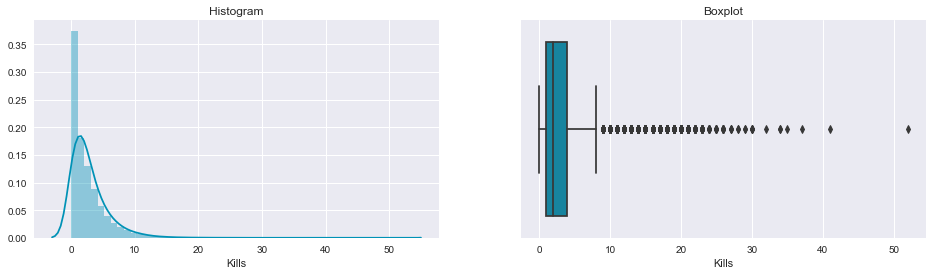


Skew:  2.0822
Mean:  2.7961
Standard Deviation:  2.8184

 -----------------
 Deaths 
 -----------------


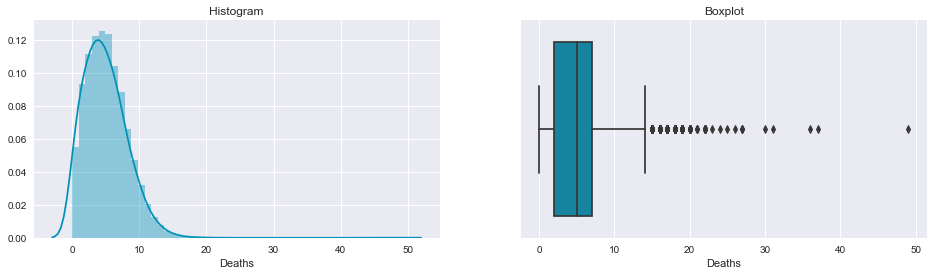


Skew:  0.7301
Mean:  4.8512
Standard Deviation:  3.1342

 -----------------
 Assists 
 -----------------


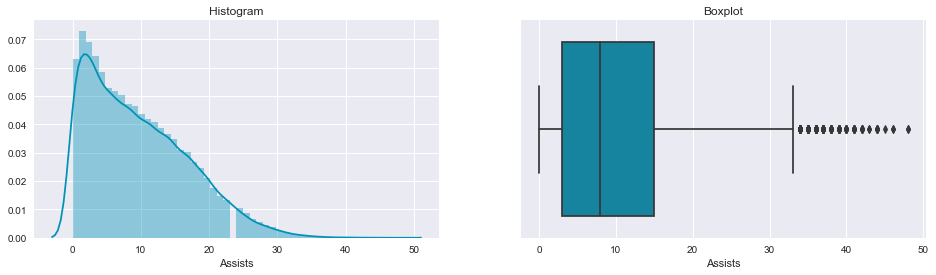


Skew:  0.7403
Mean:  9.6087
Standard Deviation:  7.3824

 -----------------
 TtlDmgChmp 
 -----------------


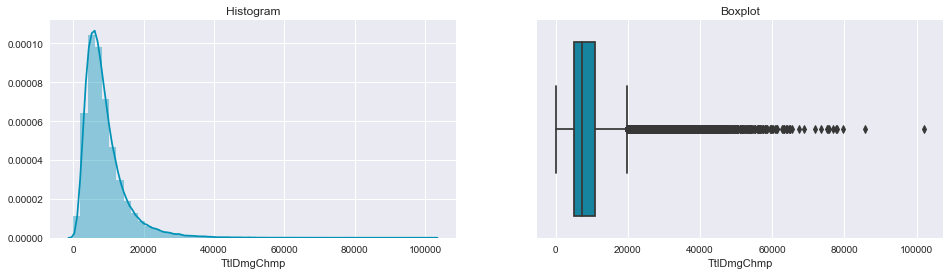


Skew:  2.3893
Mean:  8880.7253
Standard Deviation:  5970.5857

 -----------------
 VisionScore 
 -----------------


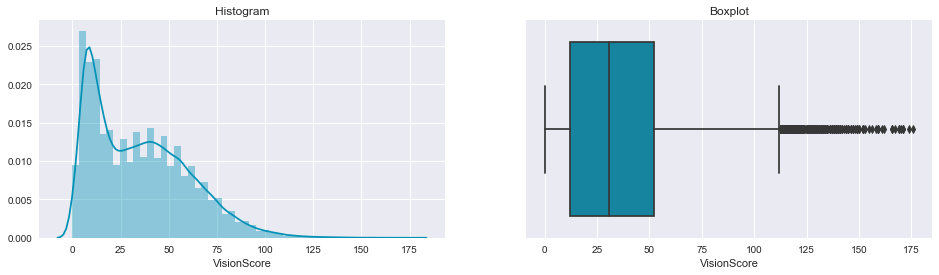


Skew:  0.7259
Mean:  34.8913
Standard Deviation:  25.1446

 -----------------
 TtlGold 
 -----------------


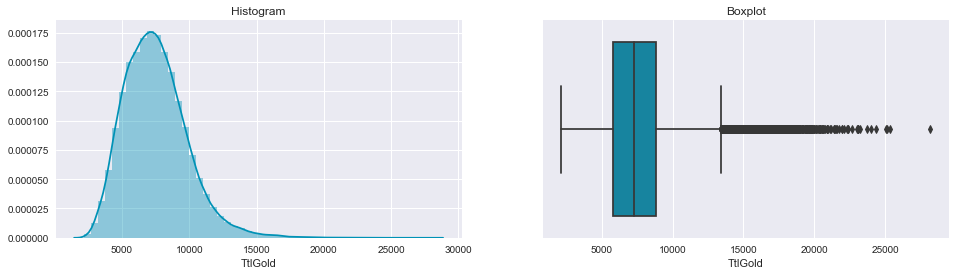


Skew:  0.8404
Mean:  7496.4356
Standard Deviation:  2343.3043

 -----------------
 Minions 
 -----------------


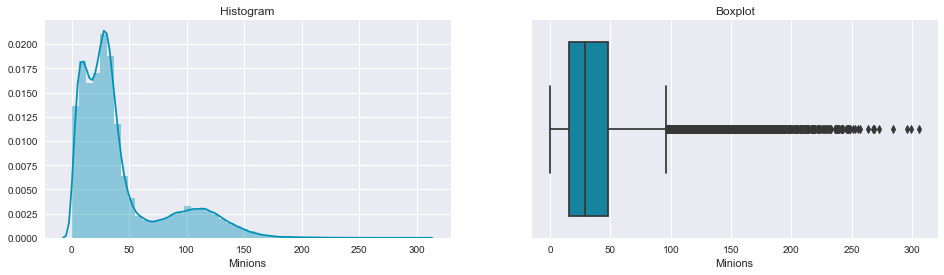


Skew:  1.4951
Mean:  42.0258
Standard Deviation:  38.7117
---------------------
 TOP 
---------------------

 -----------------
 Kills 
 -----------------


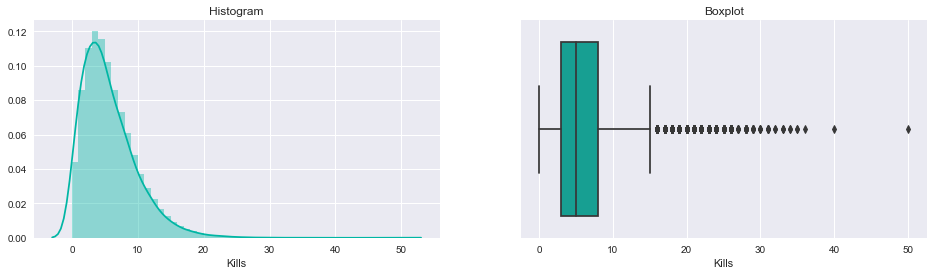


Skew:  1.2905
Mean:  5.5786
Standard Deviation:  4.0966

 -----------------
 Deaths 
 -----------------


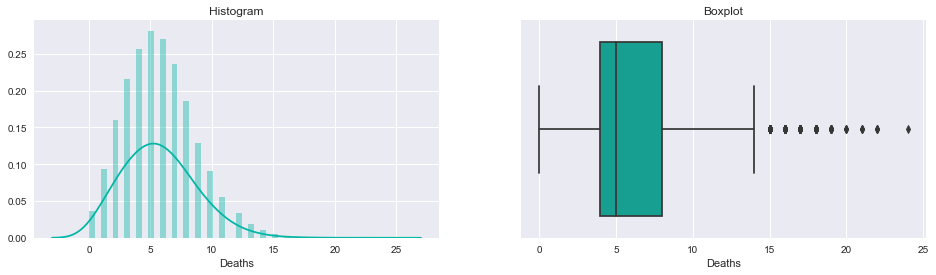


Skew:  0.4888
Mean:  5.7063
Standard Deviation:  2.9417

 -----------------
 Assists 
 -----------------


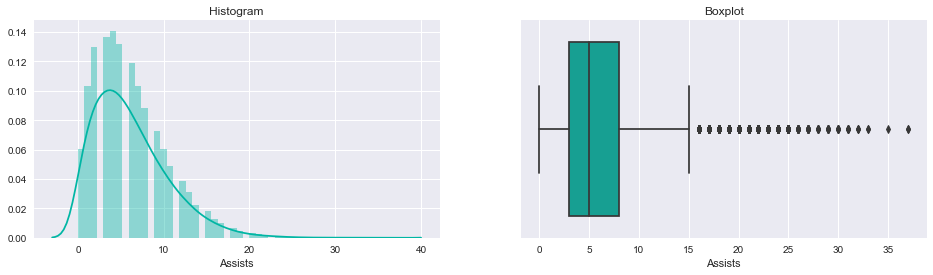


Skew:  1.0461
Mean:  6.0888
Standard Deviation:  4.3258

 -----------------
 TtlDmgChmp 
 -----------------


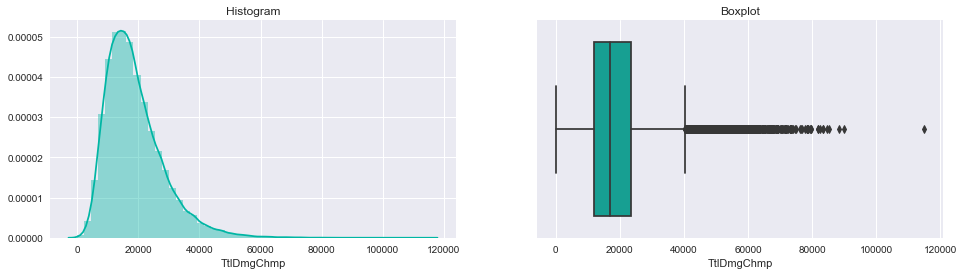


Skew:  1.3145
Mean:  18803.9176
Standard Deviation:  9388.6857

 -----------------
 VisionScore 
 -----------------


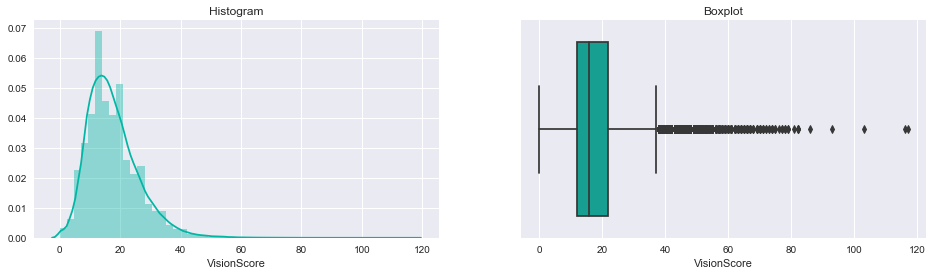


Skew:  1.1764
Mean:  17.6219
Standard Deviation:  8.5978

 -----------------
 TtlGold 
 -----------------


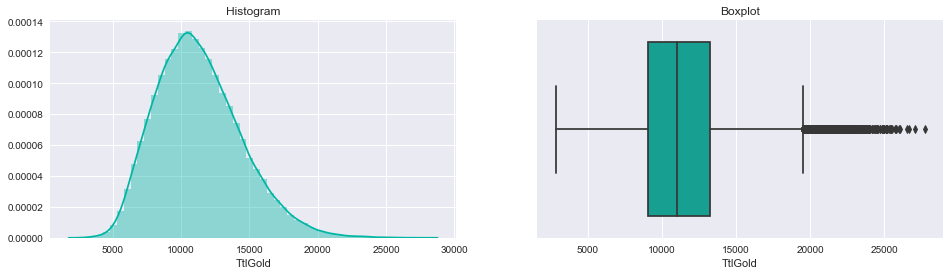


Skew:  0.5589
Mean:  11292.2142
Standard Deviation:  3110.0071

 -----------------
 Minions 
 -----------------


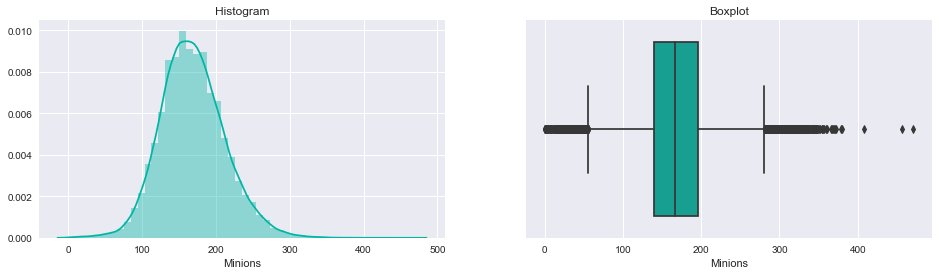


Skew:  0.2773
Mean:  168.8072
Standard Deviation:  43.4625


In [21]:
features = ['Kills', 'Deaths', 'Assists', 'TtlDmgChmp', 'VisionScore', 'TtlGold', 
            'Minions']

for idx, i in enumerate(roles):
    role = i[0]
    df = i[1]
    print('---------------------\n', role.upper(), '\n---------------------')
    
    for feature in features:
        print('\n -----------------\n', feature, '\n -----------------')
        eds.plot_spread(df[feature], color=sns.color_palette()[idx])

In [22]:
# Outliers
# Sorry for the messy and iterative code
# Simmilar to the code above

role_outliers = [['Adc', [30, 20, 30, 100000, 70, 21000, 350]], 
                 ['Jungle', [30, 20 , 30, 60000, 100, 20000, 150]], 
                 ['Mid', [30, 20, 30, 80000, 80, 23000, 350]], 
                 ['Support', [10, 15, 40, 40000, 150, 15000, 110]], 
                 ['Top', [20, 17, 25, 50000, 60, 20000, 350]]]

outlier_indices = []

for player in range(1, 11):
    for role, outliers in role_outliers:
        curr_data = data[[i for i in data.columns if (i[6:8]==str(player)+'_')|(i[6:8]==str(player))]]
        
        curr_data = curr_data.loc[curr_data['player'+str(player)+'_Role']==role]
        curr_data = curr_data[['player'+str(player)+'_'+i for i in features]]
            
        for i in range(len(outliers)):
            curr_data = curr_data.loc[curr_data.iloc[:, i]<=outliers[i]]
                
        outlier_indices.append(curr_data.index)
        
print('Outliers:', len(set([i for y in outlier_indices for i in y])))
print('Data Lenght: ', data.shape[0])

Outliers: 43137
Data Lenght:  43137


&emsp;I handpicked the values that would be reasonable if we would trim the outliers. The problem here is that every game has at least 1 kind of outlier, so the whole dataset can be considered unviable because of the outliers. I can think of some solutions from the top of my head.
<br><br>
1.Our best bet is to use the algorithms that are no outlier-sensitive.
<br><br>
2.There is also an option of reducing the feature space and trying to deal with the outliers then and that might vary from dataset to dataset. We are going to take full advantage of the datasets with whom we are able to do this, but for the others, we are going to fall back to option 1.

## Team Stats

In [23]:
team_stats = [i.split('_')[1] for i in data.columns if i[:7]=='player2']
team_stats = [i for i in team_stats if i!='Role'] # .remove() refused to work for some reason

for team in ['Blue', 'Purp']:
    for stat in team_stats:
        stat_lght = len(stat)
        if team == 'Blue':
            stat_cols = data[[i for i in data.columns if i[-stat_lght:]==stat]].iloc[:, :5]
        else:
            stat_cols = data[[i for i in data.columns if i[-stat_lght:]==stat]].iloc[:, 5:10]
            
        if 'Lrgst' in stat:
            data[team+'_'+stat] = stat_cols.max(axis=1)
        else:
            data[team+'_'+stat] = stat_cols.sum(axis=1)
            
data.iloc[:5, -28:]

,Blue_Kills,Blue_Deaths,Blue_Assists,Blue_LrgstKillSpree,Blue_LrgstMultiKill,Blue_KillSprees,Blue_LrgstTimeLiving,Blue_TtlDmg,Blue_TtlDmgChmp,Blue_TtlHeal,Blue_TtlDmgObj,Blue_VisionScore,Blue_TtlGold,Blue_Minions,Purp_Kills,Purp_Deaths,Purp_Assists,Purp_LrgstKillSpree,Purp_LrgstMultiKill,Purp_KillSprees,Purp_LrgstTimeLiving,Purp_TtlDmg,Purp_TtlDmgChmp,Purp_TtlHeal,Purp_TtlDmgObj,Purp_VisionScore,Purp_TtlGold,Purp_Minions
0,36,43,48,7,3,8,753,710639,96218,49247,29186,103,64255,670,43,36,65,5,2,6,1445,858911,155612,48715,76632,139,69014,642
1,34,52,39,4,2,8,565,563569,116192,27990,41375,146,62365,561,52,34,82,7,2,11,766,666439,120275,62341,85093,152,68683,578
2,28,53,18,3,2,6,663,507952,85480,19147,11843,111,50612,577,53,28,54,14,5,10,684,582986,99307,32165,55073,81,60731,502
3,49,40,59,7,2,14,965,864336,131745,41631,75573,185,76580,744,40,49,49,6,2,7,1024,785960,122293,34745,55387,148,69766,741
4,25,40,44,3,2,8,928,603140,82638,25765,36162,143,53191,581,40,25,81,13,3,7,872,668428,102364,39416,108617,148,67236,581


&emsp;I could spend a lot more time analyzing the features 1 by 1 but we already spent a lot of time on in and got a good general idea. Feature exploration is going to continue but through exploring the correlations, finding the appropriate features and feature engineering. (And I bet you had enough of my box and dist plots)

# Correlations and Feature Relevance
&emsp;Instead of going through every player feature, we are first going to check the team stats of those features, and there decide if they are relevant. If they are, we are going to branch out to player features that are relevant.

### Team Features Correlations

In [24]:
team_data = data[[i for i in data.columns if i[:2]!='pl']]

print('---------------------\nCorrelation with goal:\n---------------------\n')
eds.print_abv_corr(team_data, team_data['Blue_Won'], 0.05)

---------------------
Correlation with goal:
---------------------

Blue_Won 1.0
Blue_KillsTower 0.7876
Blue_FirstInhib 0.7262
Blue_KillsInhib 0.6647
Blue_TtlDmgObj 0.6458
Blue_KillsDragon 0.5631
Blue_LrgstKillSpree 0.5323
Blue_Kills 0.5158
Purp_Deaths 0.5144
Blue_Assists 0.4616
Blue_KillSprees 0.4609
Blue_FirstBaron 0.4338
Blue_KillsBaron 0.4324
Blue_FirstTower 0.4251
Blue_LrgstMultiKill 0.3865
Blue_TtlGold 0.3268
Blue_KillsHerald 0.2878
Blue_FirstDragon 0.2751
Blue_FirstHerald 0.2382
Blue_TtlHeal 0.233
Blue_TtlDmg 0.2182
Blue_LrgstTimeLiving 0.2089
Blue_TtlDmgChmp 0.1981
Blue_FirstBlood 0.1845
Blue_VisionScore 0.1487
Blue_Minions 0.0842
Purp_Minions -0.1177
Purp_VisionScore -0.1847
Purp_LrgstTimeLiving -0.2128
Purp_TtlDmgChmp -0.22
Purp_FirstHerald -0.2461
Purp_TtlDmg -0.2524
Purp_TtlHeal -0.2589
Purp_KillsHerald -0.2974
Purp_TtlGold -0.3557
Purp_LrgstMultiKill -0.3946
Purp_KillsBaron -0.4527
Purp_FirstBaron -0.4587
Purp_Assists -0.466
Purp_KillSprees -0.4712
Blue_Deaths -0.5247
Purp

In [25]:
eds.print_abv_ft_corr(team_data, threshold_down=0.2)


---------------------
 GameDuration:
---------------------

Blue_FirstBaron 0.2998
Blue_KillsTower 0.3137
Blue_KillsInhib 0.2455
Blue_KillsBaron 0.4211
Blue_KillsDragon 0.386
Purp_FirstBaron 0.3319
Purp_KillsTower 0.3406
Purp_KillsInhib 0.2697
Purp_KillsBaron 0.4592
Purp_KillsDragon 0.4071
Blue_Kills 0.5925
Blue_Deaths 0.6169
Blue_Assists 0.6449
Blue_LrgstMultiKill 0.2604
Blue_KillSprees 0.5618
Blue_LrgstTimeLiving 0.3003
Blue_TtlDmg 0.9109
Blue_TtlDmgChmp 0.8767
Blue_TtlHeal 0.6833
Blue_TtlDmgObj 0.5115
Blue_VisionScore 0.8182
Blue_TtlGold 0.9018
Blue_Minions 0.8387
Purp_Kills 0.6172
Purp_Deaths 0.5925
Purp_Assists 0.6612
Purp_LrgstMultiKill 0.2822
Purp_KillSprees 0.5777
Purp_LrgstTimeLiving 0.3178
Purp_TtlDmg 0.9124
Purp_TtlDmgChmp 0.8806
Purp_TtlHeal 0.6932
Purp_TtlDmgObj 0.5321
Purp_VisionScore 0.823
Purp_TtlGold 0.9044
Purp_Minions 0.8411

---------------------
 Blue_Won:
---------------------

Blue_FirstTower 0.4251
Blue_FirstInhib 0.7262
Blue_FirstBaron 0.4338
Blue_FirstDragon 


---------------------
 Blue_KillsHerald:
---------------------

Blue_Won 0.2878
Blue_FirstTower 0.4213
Blue_FirstInhib 0.3179
Blue_FirstHerald 0.8362
Blue_KillsTower 0.3758
Blue_KillsInhib 0.2796
Blue_KillsDragon 0.2699
Purp_FirstInhib -0.2593
Purp_FirstHerald -0.6247
Purp_KillsTower -0.3094
Purp_KillsInhib -0.2263
Purp_KillsDragon -0.2042
Purp_KillsHerald -0.5653
Blue_TtlDmgObj 0.4866
Purp_TtlDmgObj -0.2685

---------------------
 Purp_FirstInhib:
---------------------

Blue_Won -0.7194
Blue_FirstTower -0.3771
Blue_FirstInhib -0.7554
Blue_FirstBaron -0.3334
Blue_FirstDragon -0.2098
Blue_FirstHerald -0.2178
Blue_KillsTower -0.6149
Blue_KillsInhib -0.576
Blue_KillsBaron -0.291
Blue_KillsDragon -0.4002
Blue_KillsHerald -0.2593
Purp_FirstBaron 0.4851
Purp_FirstHerald 0.2523
Purp_KillsTower 0.816
Purp_KillsInhib 0.7875
Purp_KillsBaron 0.4471
Purp_KillsDragon 0.5248
Purp_KillsHerald 0.3209
Blue_Kills -0.3167
Blue_Deaths 0.5085
Blue_Assists -0.2519
Blue_LrgstKillSpree -0.3887
Blue_LrgstMult

Blue_FirstInhib 0.4677
Blue_FirstBaron 0.2646
Blue_KillsTower 0.5494
Blue_KillsInhib 0.43
Blue_KillsBaron 0.2622
Blue_KillsDragon 0.3964
Purp_FirstInhib -0.3887
Purp_FirstBaron -0.2018
Purp_KillsTower -0.4113
Purp_KillsInhib -0.3153
Purp_KillsDragon -0.3047
Purp_KillsHerald -0.2
Blue_Kills 0.5747
Blue_Deaths -0.2223
Blue_Assists 0.4464
Blue_LrgstMultiKill 0.5007
Blue_KillSprees 0.3236
Blue_LrgstTimeLiving 0.2693
Blue_TtlDmg 0.2575
Blue_TtlDmgChmp 0.3061
Blue_TtlHeal 0.2483
Blue_TtlDmgObj 0.4482
Blue_TtlGold 0.3678
Purp_Kills -0.2276
Purp_Deaths 0.5742
Purp_LrgstKillSpree -0.3636
Purp_LrgstMultiKill -0.201
Purp_KillSprees -0.2098
Purp_TtlDmgObj -0.3216

---------------------
 Blue_LrgstMultiKill:
---------------------

GameDuration 0.2604
Blue_Won 0.3865
Blue_FirstInhib 0.3595
Blue_FirstBaron 0.2553
Blue_KillsTower 0.4352
Blue_KillsInhib 0.3365
Blue_KillsBaron 0.2758
Blue_KillsDragon 0.3366
Purp_FirstInhib -0.2515
Purp_KillsTower -0.2395
Blue_Kills 0.5211
Blue_Assists 0.4775
Blue_LrgstK

Blue_TtlDmg 0.396
Blue_TtlDmgChmp 0.5454
Blue_TtlHeal 0.2848
Blue_VisionScore 0.3116
Blue_TtlGold 0.4187
Blue_Minions 0.3378
Purp_Deaths 0.2482
Purp_Assists 0.8518
Purp_LrgstKillSpree 0.5837
Purp_LrgstMultiKill 0.5182
Purp_KillSprees 0.8957
Purp_TtlDmg 0.6737
Purp_TtlDmgChmp 0.8197
Purp_TtlHeal 0.5929
Purp_TtlDmgObj 0.6843
Purp_VisionScore 0.5346
Purp_TtlGold 0.8421
Purp_Minions 0.45

---------------------
 Purp_Deaths:
---------------------

GameDuration 0.5925
Blue_Won 0.5144
Blue_FirstTower 0.2789
Blue_FirstInhib 0.5164
Blue_FirstBaron 0.3986
Blue_KillsTower 0.6781
Blue_KillsInhib 0.5499
Blue_KillsBaron 0.4509
Blue_KillsDragon 0.5647
Purp_FirstInhib -0.3154
Purp_KillsTower -0.2453
Purp_KillsHerald -0.2128
Blue_Kills 0.9996
Blue_Deaths 0.2511
Blue_Assists 0.848
Blue_LrgstKillSpree 0.5742
Blue_LrgstMultiKill 0.5204
Blue_KillSprees 0.8883
Blue_TtlDmg 0.6512
Blue_TtlDmgChmp 0.8102
Blue_TtlHeal 0.575
Blue_TtlDmgObj 0.6633
Blue_VisionScore 0.5005
Blue_TtlGold 0.8285
Blue_Minions 0.4212
Pu


---------------------
 Purp_TtlGold:
---------------------

GameDuration 0.9044
Blue_Won -0.3557
Blue_KillsBaron 0.2292
Purp_FirstInhib 0.4211
Purp_FirstBaron 0.4942
Purp_KillsTower 0.6392
Purp_KillsInhib 0.5083
Purp_KillsBaron 0.6034
Purp_KillsDragon 0.5901
Blue_Kills 0.3929
Blue_Deaths 0.8402
Blue_Assists 0.4522
Blue_KillSprees 0.385
Blue_TtlDmg 0.7456
Blue_TtlDmgChmp 0.7521
Blue_TtlHeal 0.5367
Blue_TtlDmgObj 0.2222
Blue_VisionScore 0.6736
Blue_TtlGold 0.7175
Blue_Minions 0.722
Purp_Kills 0.8421
Purp_Deaths 0.3934
Purp_Assists 0.8212
Purp_LrgstKillSpree 0.414
Purp_LrgstMultiKill 0.4412
Purp_KillSprees 0.7777
Purp_LrgstTimeLiving 0.3293
Purp_TtlDmg 0.9424
Purp_TtlDmgChmp 0.9219
Purp_TtlHeal 0.7316
Purp_TtlDmgObj 0.7566
Purp_VisionScore 0.8202
Purp_Minions 0.8175

---------------------
 Purp_Minions:
---------------------

GameDuration 0.8411
Blue_FirstBaron 0.2854
Blue_KillsBaron 0.3884
Blue_KillsDragon 0.2895
Purp_FirstBaron 0.3301
Purp_KillsTower 0.3986
Purp_KillsInhib 0.2845
Purp_

&emsp;To spare you from going through all of this, I am going to summarize the most important points I derived from the previous two cells.

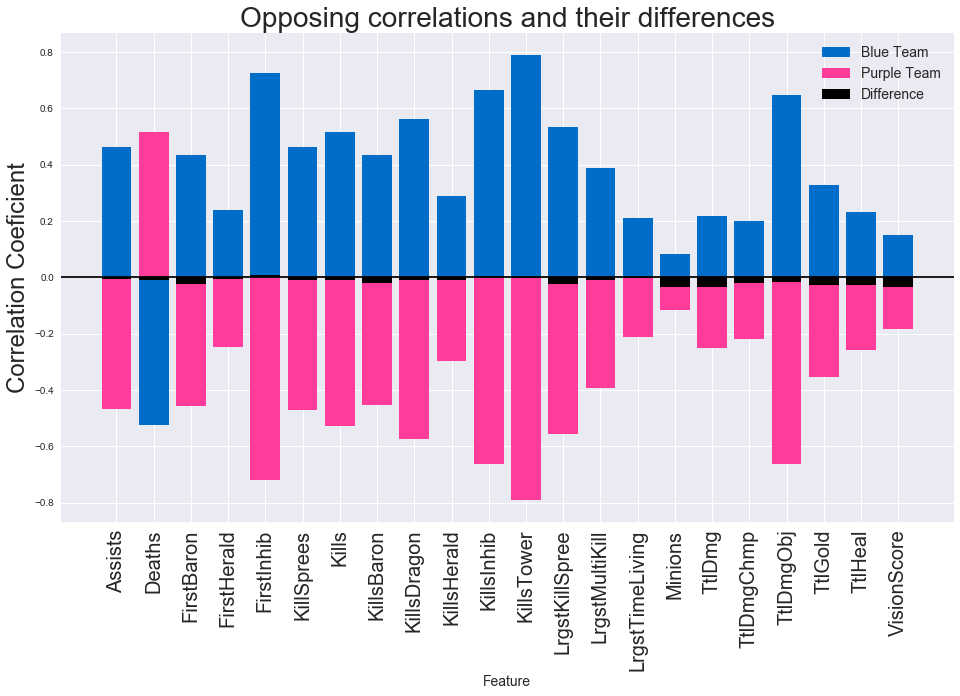

In [26]:
# Significan columns
team_corrs = eds.get_abv_corr(team_data.drop('Blue_Won', axis=1),
                          team_data['Blue_Won'], threshold=0.05)
team_corrs.sort()

# Correlation of significant columns
purp_corrs = [[i[5:], round(team_data[i].corr(team_data['Blue_Won']), 4)] for i in team_corrs if i[:5]=='Purp_']

blue_corrs = [[i[5:], round(team_data[i].corr(team_data['Blue_Won']), 4)] for i in team_corrs if i[:5]=='Blue_']
blue_corrs = [i for i in blue_corrs if i[0] in [y[0] for y in purp_corrs]]

final_corrs = [[i[0], round(i[1]+y[1], 4)] for i, y in zip(blue_corrs, purp_corrs)]


fig, ax = plt.subplots(figsize=(16, 9))

ax.axhline(0, color='k')

ax.bar([i[0] for i in blue_corrs], [i[1] for i in blue_corrs],
       color=sns.color_palette()[2], label='Blue Team')
ax.bar([i[0] for i in purp_corrs], [i[1] for i in purp_corrs], color='#FF3C9A',
       label='Purple Team')
ax.bar([i[0] for i in final_corrs], [i[1] for i in final_corrs], color='k', 
       label='Difference')

ax.set_title('Opposing correlations and their differences', fontsize=28)
ax.set_xlabel('Feature', fontsize=14)
ax.set_ylabel('Correlation Coeficient', fontsize=24)
ax.legend(fontsize=14)

ax.xaxis.set_tick_params(rotation=90, labelsize=20)

&emsp;The first cell is much shorter and thus, more straight-forward. The blue and purple features are practically the opposites of one another so the difference data I've been talking about seems almost inevitable for teams. Also, the slight advantage in the difference suggests the higher win percentage with the purple team. 

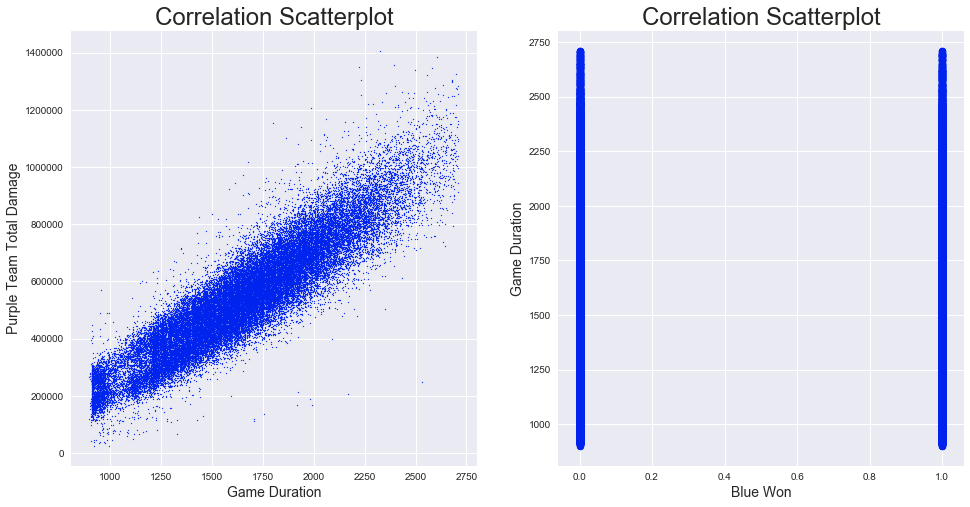

Correlation of Game Duration with Purple Team Total Damage: 0.9124 
Correlation of Game Duration with Blye Won: -0.0176


In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].scatter(team_data['GameDuration'], team_data['Purp_TtlDmg'], s=1)

ax[0].set_title('Correlation Scatterplot', fontsize=24)
ax[0].set_xlabel('Game Duration', fontsize=14)
ax[0].set_ylabel('Purple Team Total Damage', fontsize=14)


ax[1].scatter(team_data['Blue_Won'], team_data['GameDuration'])

ax[1].set_title('Correlation Scatterplot', fontsize=24)
ax[1].set_xlabel('Blue Won', fontsize=14)
ax[1].set_ylabel('Game Duration', fontsize=14)

plt.show()

print('Correlation of Game Duration with Purple Team Total Damage:',
      round(team_data['Purp_TtlDmg'].corr(team_data['GameDuration']), 4), 
      '\nCorrelation of Game Duration with Blye Won:',
      round(team_data['Blue_Won'].corr(team_data['GameDuration']), 4))

data = data.drop('GameDuration', axis=1)
team_data = team_data.drop('GameDuration', axis=1)

&emsp;Aside from some logical things (like that total damage dealt has to correlate with the game duration since more minutes = more things happen so to say). That is about everything regarding the correlation of any other feature with the Game Duration except the Blue_Won feature where there isn't any correlation at all with it so it is safe to drop the Game Duration from predictive modeling.

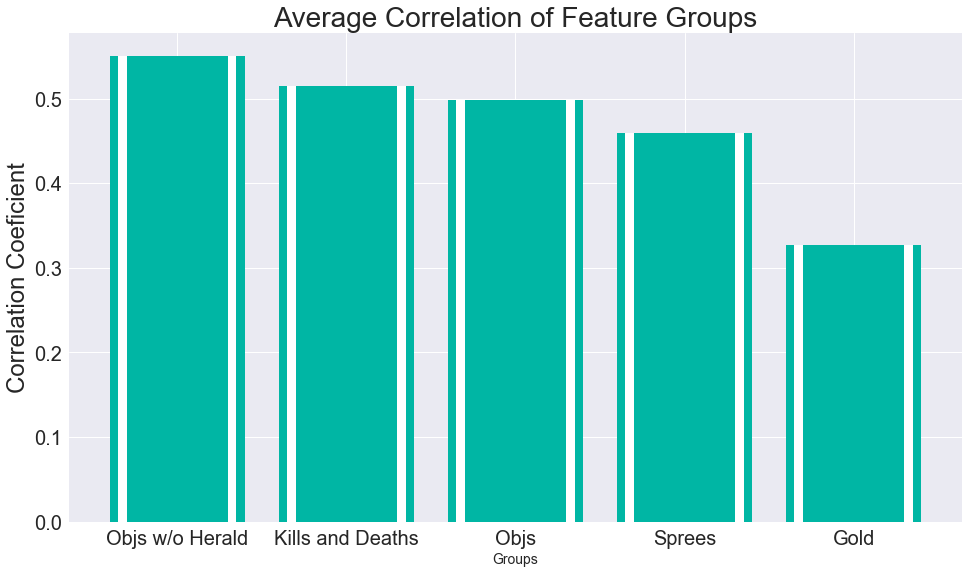

In [28]:
obj_cols = [i for i in team_data.columns if any(obj in i for obj in ['Dragon', 
                        'Inhib', 'Herald', 'Baron', 'Tower']) and i[0]=='B']

obj_cols.append('Blue_TtlDmgObj')
obj_noherald_cols = [i for i in obj_cols if 'Herald' not in i]
kd_cols = ['Blue_Kills', 'Purp_Deaths']
spree_cols = ['Blue_LrgstKillSpree', 'Blue_LrgstMultiKill']
gold = ['Blue_TtlGold']

corrs = []

for cols in [obj_noherald_cols, kd_cols, obj_cols, spree_cols, gold]:
    corrs.append(round(team_data[cols].corrwith(team_data['Blue_Won']).mean(), 4))

fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(['Objs w/o Herald', 'Kills and Deaths', 'Objs', 'Sprees', 'Gold'],
       corrs, color=sns.color_palette()[4])
ax.bar(['Objs w/o Herald', 'Kills and Deaths', 'Objs', 'Sprees', 'Gold'],
       corrs, width=0.7, color='w')
ax.bar(['Objs w/o Herald', 'Kills and Deaths', 'Objs', 'Sprees', 'Gold'],
       corrs, color=sns.color_palette()[4], width=0.6)

ax.set_title('Average Correlation of Feature Groups', fontsize=28)
ax.set_xlabel('Groups', fontsize=14)
ax.set_ylabel('Correlation Coeficient', fontsize=24)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

&emsp;I wanted to check my assumptions with between-feature correlation and that is the fact that almost everything correlates better to the goal than Total Team Gold which is quite a surprise since gold is the most popular statistic when it comes to comparing the difference in team advantages in a certain game. The correlations are arranged in this order:
<br><br>
&emsp;&emsp;*(Objectives w/o herald)> Kills and Deaths > Objectives > Sprees and Multi kills > Gold*

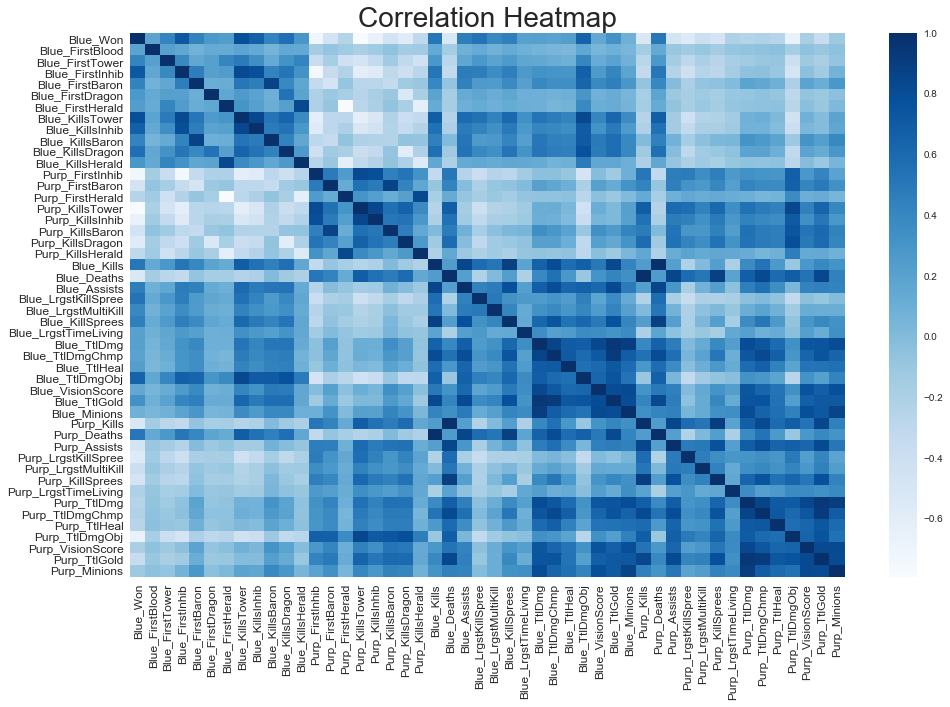

In [29]:
fig, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(team_data.corr(), cmap='Blues', ax=ax)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_title('Correlation Heatmap', fontsize=28);

&emsp;That leads us to the second important observation which is that features correlate too much to each other. Simply put, the snowball effect is real. Killing more towers gives a team more gold and thus advantage which in return makes a team able to take more objectives and snowball even more. This is the pattern I noticed every time I wanted to try and analyze a feature but then, I end up just concluding that it correlates with everything and it is certain that regularization is going to be essential.
<br><br>
&emsp;Also purple stats are basically everything I said but just opposite.

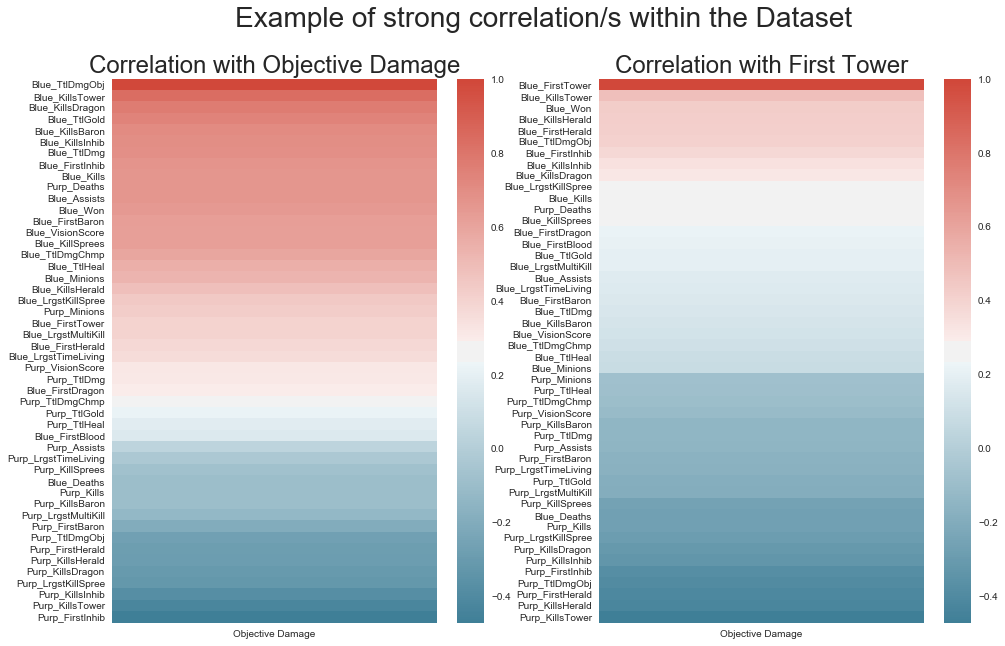

In [30]:
obcorr = pd.DataFrame(team_data.corrwith(team_data['Blue_TtlDmgObj']).sort_values(ascending=False))
corr = pd.DataFrame(team_data.corrwith(team_data['Blue_FirstTower']).sort_values(ascending=False))

fig, ax = plt.subplots(1, 2, figsize=(16, 10))

sns.heatmap(obcorr, cmap=sns.diverging_palette(225, 15, n=2000), ax=ax[0])
sns.heatmap(corr, cmap=sns.diverging_palette(225, 15, n=2000), ax=ax[1])

ax[0].set_title('Correlation with Objective Damage', fontsize=24)
ax[1].set_title('Correlation with First Tower', fontsize=24)
ax[0].set_xticklabels(['Objective Damage'])
ax[1].set_xticklabels(['Objective Damage'])

fig.suptitle('Example of strong correlation/s within the Dataset', fontsize=28);

data = data.drop([i for i in data.columns if 'O' in i], axis=1)
team_data = team_data.drop([i for i in team_data.columns if 'O' in i], axis=1)

&emsp;Objective damage is the best example of a strong correlation with a lot of other features. Since getting more dragons, barons, heralds, inhibitors, and towers all increase the objective damage dealt by a team. It is safe to leave it out of the picture since we already have many features that regard objectives.

In [31]:
print('Blue First Tower and Blue First Blood Correlation:', 
      round(team_data['Blue_FirstTower'].corr(team_data['Blue_FirstBlood']), 4))

Blue First Tower and Blue First Blood Correlation: 0.2105


Other things I've noticed:

- Blue first tower correlates okay with the blue first blood which could imply the previously discovered blue's early pressure advantage.

In [32]:
for idx, team in enumerate(['Purp', 'Blue']):

    p_ab = team_data.loc[(team_data['Blue_FirstTower']==idx)&(team_data['Blue_Won']==idx)].shape[0]
    p_b = team_data.loc[team_data['Blue_FirstTower']==idx].shape[0]

    print('Probability', '('+team, 'team Wins | First Tower):',
          str(round(p_ab/p_b, 4)*100)+'%')

Probability (Purp team Wins | First Tower): 72.53%
Probability (Blue team Wins | First Tower): 69.98%


- First towers are also good early indicators of who could win a game.

In [33]:
drake = team_data.loc[team_data['Blue_FirstDragon']==1]
no_drake = team_data.loc[team_data['Blue_FirstDragon']==0]

print('Blue Team average number of Dragons when they take the first one:',
      round(drake['Blue_KillsDragon'].mean(), 2))
print("Blue Team average number of Dragons when they don't take the first one:",
      round(no_drake['Blue_KillsDragon'].mean(), 2))

Blue Team average number of Dragons when they take the first one: 2.57
Blue Team average number of Dragons when they don't take the first one: 1.12


- The first dragon is essential for who gets the bigger number of dragons in a game.

In [34]:
herald_taken = team_data.loc[(team_data['Blue_FirstHerald']==1)|(team_data['Purp_FirstHerald']==1)]

p_ab = herald_taken.loc[(team_data['Blue_FirstHerald']==1)&(team_data['Blue_FirstTower']==1)].shape[0]
p_b = herald_taken.loc[team_data['Blue_FirstHerald']==1].shape[0]

print('Probability (Blue team First Tower | First Herald):',
      str(round(p_ab/p_b, 4)*100)+'%')

Probability (Blue team First Tower | First Herald): 73.02%


- Killing the first herald correlates with getting the first tower which expresses the importance the herald has on pushing lanes. The chain correlation between theh first herald -> first tower -> better win% could be a big discovery that could be used as an in-game strategy (more research needed). And also, killing the first herald strongly correlates with the number of herald since you can only get 2.

### Feature correction
*Based on previous discoveries

In [35]:
vanilla_data = data.copy()

# Minions
relevant_ftrs = eds.get_abv_corr(team_data, team_data['Blue_Won'], 0.1)
print('Features with corr. coef. <0.1:',
      [i for i in team_data.columns if i not in relevant_ftrs])

data = data.drop([i for i in data.columns if 'Minions' in i], axis=1)
team_data = team_data.drop([i for i in team_data.columns if 'Minions' in i], axis=1)

Features with corr. coef. <0.1: ['Blue_Minions']


&emsp;Minions are the feature that correlates with the goal the least and it also has a strong correlation with Total Gold since Minions are the primary sort of gold income in the game.
<br><br>
&emsp;Aside from all of that, I will still keep the vanilla dataset where these features weren't dropped and try and do some learning with it and I might get lucky for it to not overfit. It also might be a good alternative if we look at the performance-time complexity tradeoff, of course, given that it performs well enough.

In [36]:
# New feature (Kills, Deaths and Assists to KDA Ratio)
# Strange syntax is there because I want to preserve the column order

dfs = [team_data, data]

for team in ['Blue', 'Purp']:
    for i in range(2):
       dfs[i][team+'_Kills'] = (dfs[i][team+'_Kills'] + dfs[i][team+'_Assists']) / dfs[i][team+'_Deaths'].replace(0, 1)
    
       dfs[i] = dfs[i].rename(columns={team+'_Kills': team+'_KDAratio'})
       dfs[i] = dfs[i].drop([team+'_Deaths', team+'_Assists'], axis=1)
    
team_data = dfs[0]
data = dfs[1]

print("Correlation between teams' KDA:", round(team_data['Blue_KDAratio'].corr(team_data['Purp_KDAratio']), 4))

Correlation between teams' KDA: -0.5695


&emsp;Kills, Deaths and Assists can be compressed into the KDA ratio feature without much information loss.

In [37]:
# KDA for players

for player in range(1, 11):
    player = str(player)
    data['player'+player+'_Kills'] = (data['player'+player+'_Kills'] + data['player'+player+'_Assists']) / data['player'+player+'_Deaths'].replace(0, 1)
    
    data = data.rename(columns={'player'+player+'_Kills': 'player'+player+'_KDAratio'})
    data = data.drop(['player'+player+'_Deaths', 'player'+player+'_Assists'], axis=1)

In [38]:
# Difference team data

nodiff_team_data = pd.concat([team_data['Blue_Won'], 
                              team_data[[i for i in team_data.columns if i[5]=='F']]], axis=1)

team_data_to_diff = team_data[[i for i in team_data.columns if i not in nodiff_team_data.columns]]
team_data_to_diff.columns = [i[5:] for i in team_data_to_diff.columns]

objs = team_data_to_diff.iloc[:, :5] - team_data_to_diff.iloc[:, 5:10]
stats = team_data_to_diff.iloc[:, 10:20] - team_data_to_diff.iloc[:, 20:]

diff_team_data = pd.concat([nodiff_team_data, objs, stats], axis=1)
diff_team_data.head()

,Blue_Won,Blue_FirstBlood,Blue_FirstTower,Blue_FirstInhib,Blue_FirstBaron,Blue_FirstDragon,Blue_FirstHerald,Purp_FirstInhib,Purp_FirstBaron,Purp_FirstHerald,KillsTower,KillsInhib,KillsBaron,KillsDragon,KillsHerald,KDAratio,LrgstKillSpree,LrgstMultiKill,KillSprees,LrgstTimeLiving,TtlDmg,TtlDmgChmp,TtlHeal,VisionScore,TtlGold
0,0,0,0,0,0,1,0,1,1,1,-5,-2,-1,0,-1,-1.046512,2,1,2,-692,-148272,-59394,532,-36,-4759
1,0,1,1,0,1,1,1,1,0,0,-7,-2,1,-3,1,-2.537330,-3,0,-3,-201,-102870,-4083,-34351,-6,-6318
2,0,0,0,0,0,0,0,1,0,1,-9,-2,0,-3,-1,-2.953504,-11,-3,-4,-21,-75034,-13827,-13018,30,-10119
3,1,1,1,1,1,1,0,0,0,1,7,3,0,3,-2,0.883673,1,0,7,-59,78376,9452,6886,37,6814
4,0,0,1,0,0,0,1,1,1,0,-8,-3,-2,-3,0,-3.115000,-10,-1,1,56,-65288,-19726,-13651,-5,-14045


### New Team Features Correlations

In [39]:
print('---------------------\nCorrelation with goal:\n---------------------\n')
eds.print_abv_corr(diff_team_data, diff_team_data['Blue_Won'], 0.05)

---------------------
Correlation with goal:
---------------------

Blue_Won 1.0
TtlGold 0.908
KillsTower 0.8802
KillsInhib 0.7801
TtlDmg 0.7564
KillSprees 0.7486
Blue_FirstInhib 0.7262
TtlDmgChmp 0.7169
KDAratio 0.7143
LrgstKillSpree 0.6598
KillsDragon 0.6358
KillsBaron 0.5618
LrgstMultiKill 0.5406
VisionScore 0.4849
TtlHeal 0.4679
Blue_FirstBaron 0.4338
Blue_FirstTower 0.4251
KillsHerald 0.3307
LrgstTimeLiving 0.3233
Blue_FirstDragon 0.2751
Blue_FirstHerald 0.2382
Blue_FirstBlood 0.1845
Purp_FirstHerald -0.2461
Purp_FirstBaron -0.4587
Purp_FirstInhib -0.7194


In [40]:
eds.print_abv_ft_corr(diff_team_data, threshold_down=0)


---------------------
 Blue_Won:
---------------------

Blue_FirstBlood 0.1845
Blue_FirstTower 0.4251
Blue_FirstInhib 0.7262
Blue_FirstBaron 0.4338
Blue_FirstDragon 0.2751
Blue_FirstHerald 0.2382
Purp_FirstInhib -0.7194
Purp_FirstBaron -0.4587
Purp_FirstHerald -0.2461
KillsTower 0.8802
KillsInhib 0.7801
KillsBaron 0.5618
KillsDragon 0.6358
KillsHerald 0.3307
KDAratio 0.7143
LrgstKillSpree 0.6598
LrgstMultiKill 0.5406
KillSprees 0.7486
LrgstTimeLiving 0.3233
TtlDmg 0.7564
TtlDmgChmp 0.7169
TtlHeal 0.4679
VisionScore 0.4849
TtlGold 0.908

---------------------
 Blue_FirstBlood:
---------------------

Blue_Won 0.1845
Blue_FirstTower 0.2105
Blue_FirstInhib 0.1592
Blue_FirstBaron 0.07
Blue_FirstDragon 0.1353
Blue_FirstHerald 0.128
Purp_FirstInhib -0.1525
Purp_FirstBaron -0.0757
Purp_FirstHerald -0.1277
KillsTower 0.2152
KillsInhib 0.1651
KillsBaron 0.0773
KillsDragon 0.1661
KillsHerald 0.1568
KDAratio 0.2405
LrgstKillSpree 0.1633
LrgstMultiKill 0.1209
KillSprees 0.2173
LrgstTimeLiving 0.12


---------------------
 LrgstKillSpree:
---------------------

Blue_Won 0.6598
Blue_FirstBlood 0.1633
Blue_FirstTower 0.3474
Blue_FirstInhib 0.5271
Blue_FirstBaron 0.2788
Blue_FirstDragon 0.2105
Blue_FirstHerald 0.1755
Purp_FirstInhib -0.5222
Purp_FirstBaron -0.3076
Purp_FirstHerald -0.189
KillsTower 0.6588
KillsInhib 0.5397
KillsBaron 0.3405
KillsDragon 0.4845
KillsHerald 0.2552
KDAratio 0.7195
LrgstMultiKill 0.5739
KillSprees 0.5275
LrgstTimeLiving 0.4292
TtlDmg 0.5766
TtlDmgChmp 0.6076
TtlHeal 0.3629
VisionScore 0.3923
TtlGold 0.7436

---------------------
 LrgstMultiKill:
---------------------

Blue_Won 0.5406
Blue_FirstBlood 0.1209
Blue_FirstTower 0.2721
Blue_FirstInhib 0.4226
Blue_FirstBaron 0.2302
Blue_FirstDragon 0.1644
Blue_FirstHerald 0.1365
Purp_FirstInhib -0.4177
Purp_FirstBaron -0.2501
Purp_FirstHerald -0.15
KillsTower 0.5195
KillsInhib 0.4235
KillsBaron 0.2819
KillsDragon 0.3721
KillsHerald 0.1994
KDAratio 0.5274
LrgstKillSpree 0.5739
KillSprees 0.4507
LrgstTimeLiving 0.2

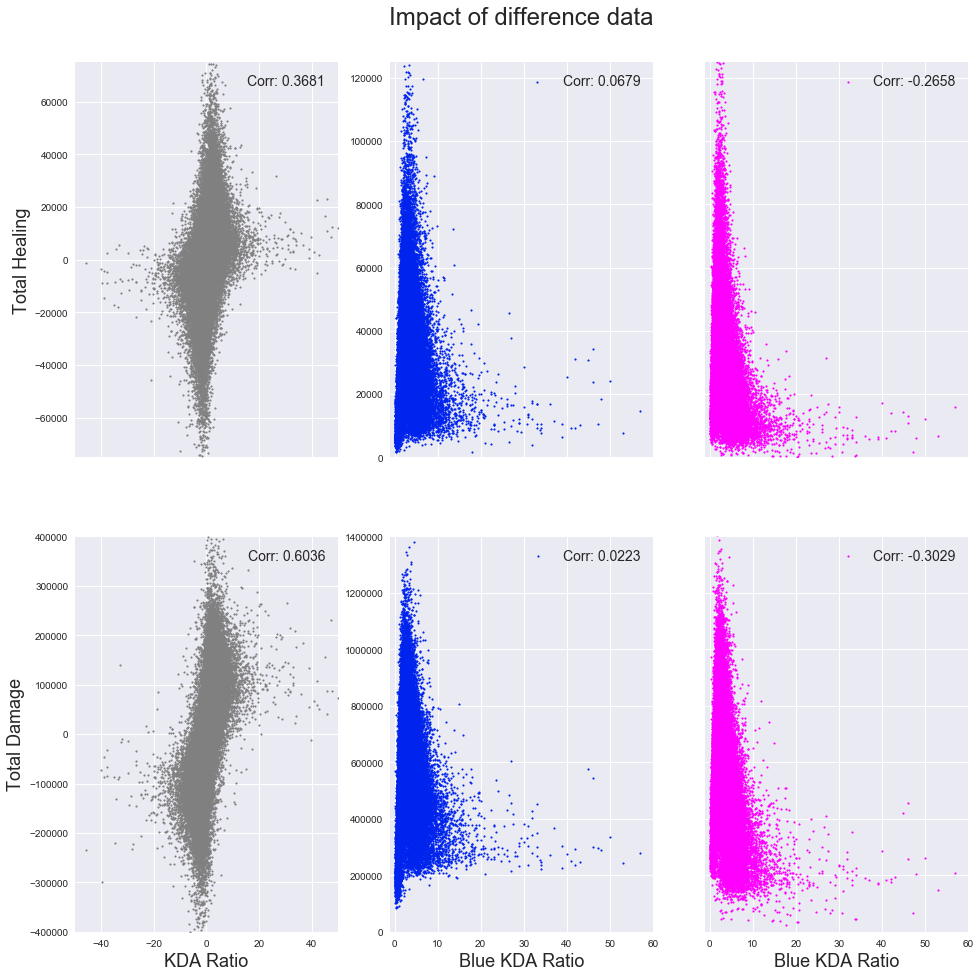

In [41]:
fig, ax = plt.subplots(2, 3, figsize=(16, 16))

ax[0,0].scatter(diff_team_data['KDAratio'], diff_team_data['TtlHeal'], s=3, color='gray',
                label='Corr: '+str(round(diff_team_data['KDAratio'].corr(diff_team_data['TtlHeal']), 4)))
ax[0,0].set_xlim(-50, 50)
ax[0,0].set_ylim(-75000, 75000)
ax[0,0].get_xaxis().set_ticklabels([])
ax[0,0].set_ylabel('Total Healing', fontsize=18)
ax[0,0].legend(fontsize=14, loc=1)

ax[0,1].scatter(team_data['Blue_KDAratio'], team_data['Blue_TtlHeal'], s=3,
                label='Corr: '+str(round(team_data['Blue_KDAratio'].corr(team_data['Blue_TtlHeal']), 4)))
ax[0,1].set_xlim(-1, 60)
ax[0,1].set_ylim(0, 125000)
ax[0,1].get_xaxis().set_ticklabels([])
ax[0,1].legend(fontsize=14)
ax[0,1].set_title('Impact of difference data', fontsize=24, y=1.08)

ax[0,2].scatter(team_data['Blue_KDAratio'], team_data['Purp_TtlHeal'], s=3, color='magenta',
                label='Corr: '+str(round(team_data['Blue_KDAratio'].corr(team_data['Purp_TtlHeal']), 4)))
ax[0,2].set_xlim(-1, 60)
ax[0,2].set_ylim(0, 125000)
ax[0,2].get_xaxis().set_ticklabels([])
ax[0,2].get_yaxis().set_ticklabels([])
ax[0,2].legend(fontsize=14)


ax[1,0].scatter(diff_team_data['KDAratio'], diff_team_data['TtlDmg'], s=3, color='gray',
                label='Corr: '+str(round(diff_team_data['KDAratio'].corr(diff_team_data['TtlDmg']), 4)))
ax[1,0].set_xlim(-50, 50)
ax[1,0].set_ylim(-400000, 400000)
ax[1,0].set_xlabel('KDA Ratio', fontsize=18)
ax[1,0].set_ylabel('Total Damage', fontsize=18)
ax[1,0].legend(fontsize=14, loc=1)

ax[1,1].scatter(team_data['Blue_KDAratio'], team_data['Blue_TtlDmg'], s=3,
                label='Corr: '+str(round(team_data['Blue_KDAratio'].corr(team_data['Blue_TtlDmg']), 4)))
ax[1,1].set_xlim(-1, 60)
ax[1,1].set_ylim(0, 1400000)
ax[1,1].set_xlabel('Blue KDA Ratio', fontsize=18)
ax[1,1].legend(fontsize=14)

ax[1,2].scatter(team_data['Blue_KDAratio'], team_data['Purp_TtlDmg'], s=3, color='magenta',
                label='Corr: '+str(round(team_data['Blue_KDAratio'].corr(team_data['Purp_TtlDmg']), 4)))
ax[1,2].set_xlim(-1, 60)
ax[1,2].set_ylim(0, 1400000)
ax[1,2].get_yaxis().set_ticklabels([])
ax[1,2].set_xlabel('Blue KDA Ratio', fontsize=18)
ax[1,2].legend(fontsize=14);

&emsp;The difference data has significantly reduced the feature space and surprisingly, it ended up with very strong correlation values. The possible tradeoff we have to make is the information loss but the training time and models could be simplified. I am leaving that prediction part.
<br><br>
&emsp;Another very important thing I wanted to say is that my point has finally been made! The gold difference seems to be the single best feature for the difference data. This might be very useful in the future.

In [42]:
print('Gold difference and Blue Won corr. coef.:', 
      round(diff_team_data['Blue_Won'].corr(diff_team_data['TtlGold']), 4))

Gold difference and Blue Won corr. coef.: 0.908


### Player Features Correlations

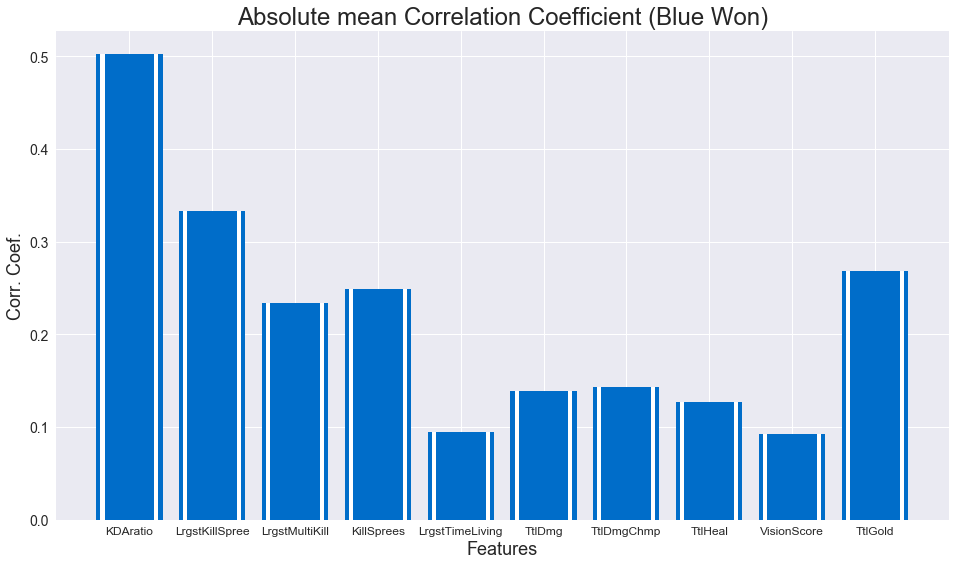

In [43]:
# Average correlation coefficient over all players

player_cols = [i[8:] for i in data.iloc[:, 20:30].columns]
player_corrs = [[] for i in range(10)]

for player in range(1, 11):
    player = str(player)
    if len(player) == 1:
        player += '_'
    
    cols = [i for i in data.columns if i[6:8]==player][:10]
    curr_data = data[cols]
    
    for idx, corr in enumerate(curr_data.corrwith(data['Blue_Won']).iteritems()):
        player_corrs[idx].append(corr[1])
    
player_corrs = [np.round(np.mean(np.absolute(i)), 4) for i in player_corrs]

fig, ax = plt.subplots(figsize=(16,9))

ax.bar(player_cols, player_corrs, color=sns.color_palette()[2])
ax.bar(player_cols, player_corrs, color='w', width=0.7)
ax.bar(player_cols, player_corrs, color=sns.color_palette()[2], width=0.6)

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=14)

ax.set_xlabel('Features', fontsize=18)
ax.set_ylabel('Corr. Coef.', fontsize=18)
ax.set_title('Absolute mean Correlation Coefficient (Blue Won)', fontsize=24);

In [44]:
player_data = data[[i for i in data.columns if 'pl' in i]]

for col in ['LrgstTimeLiving', 'VisionScore']:
    player_data = player_data[[i for i in player_data.columns if col not in i]]

eds.print_abv_ft_corr(player_data.iloc[:, :8])


---------------------
 player1_KDAratio:
---------------------

player1_LrgstKillSpree 0.5212
player1_LrgstMultiKill 0.2391
player1_KillSprees 0.1744
player1_TtlDmg 0.0723
player1_TtlDmgChmp 0.1204
player1_TtlHeal 0.1492
player1_TtlGold 0.197

---------------------
 player1_LrgstKillSpree:
---------------------

player1_KDAratio 0.5212
player1_LrgstMultiKill 0.6359
player1_KillSprees 0.5979
player1_TtlDmg 0.4555
player1_TtlDmgChmp 0.553
player1_TtlHeal 0.1674
player1_TtlGold 0.6067

---------------------
 player1_LrgstMultiKill:
---------------------

player1_KDAratio 0.2391
player1_LrgstKillSpree 0.6359
player1_KillSprees 0.5929
player1_TtlDmg 0.4231
player1_TtlDmgChmp 0.5178
player1_TtlHeal 0.1413
player1_TtlGold 0.5731

---------------------
 player1_KillSprees:
---------------------

player1_KDAratio 0.1744
player1_LrgstKillSpree 0.5979
player1_LrgstMultiKill 0.5929
player1_TtlDmg 0.523
player1_TtlDmgChmp 0.6747
player1_TtlHeal 0.1993
player1_TtlGold 0.7086

---------------------


&emsp;Player features suffer a lot less from the correlations between each other which could make them more viable (with exceptions e.g. Kill Sprees and Lrgst Kill Sprees).

In [45]:
# Influencers by role for player diff

valid_roles = ['Adc', 'Jungle', 'Mid', 'Support', 'Top']

team1_okteams = []

team1 = player_data[['player'+str(i)+'_Role' for i in range(1, 6)]]
for idx, row in team1.iterrows():
    roles = list(row)
    roles.sort()
    if valid_roles == roles:
        team1_okteams.append(idx)
        
team2_okteams = []

team2 = player_data[['player'+str(i)+'_Role' for i in range(6, 11)]]
for idx, row in team2.iterrows():
    roles = list(row)
    roles.sort()
    if valid_roles == roles:
        team2_okteams.append(idx)
        
ok_games = [i for i in team1_okteams if i in team2_okteams]

print('Number of games with valid roles:', len(ok_games),
      '('+str(round(len(ok_games)/len(data)*100, 2))+'%)')

Number of games with valid roles: 22185 (51.43%)


In [46]:
# Sorting dataframes so I can take the difference
# Iterative and slow code
teams = [player_data.iloc[ok_games, :45], player_data.iloc[ok_games, 45:]]

# Renaming Columns
for idx in range(2):
    for start, role in zip(range(0, 45, 9), valid_roles):
        for col in teams[idx].iloc[:, start:start + 9].columns:
            teams[idx] = teams[idx].rename(columns={col:role+'_'+col.split('_')[1]})

for idx in range(2):
    to_concat = []
    for col in valid_roles:
        curr_data = pd.DataFrame(columns=[i for i in teams[idx].columns if col in i])
    
        for role in valid_roles:
            curr_cols = teams[idx][[i for i in teams[idx].columns if role in i]]
            curr_cols = curr_cols.loc[curr_cols.iloc[:, -1]==col] # Rows with Role
            curr_cols.columns = curr_data.columns # Renaming for concat
        
            curr_data = pd.concat([curr_data, curr_cols], axis=0)
            
        curr_data.sort_index(inplace=True)
        to_concat.append(curr_data)

    teams[idx] = pd.concat(to_concat, axis=1)
    
# Dropping the Role Columns and converting obj type
for idx in range(2):
    teams[idx] = teams[idx].drop([i for i in teams[idx].columns if 'Role' in i],
                                  axis=1).astype('float64')
        
diff_player_data = teams[0] - teams[1]

In [47]:
print('---------------------\nCorrelation with goal:\n---------------------\n')
eds.print_abv_corr(diff_player_data, data['Blue_Won'], 0.3)

---------------------
Correlation with goal:
---------------------

Jungle_KDAratio 0.6226
Adc_KDAratio 0.5957
Support_KDAratio 0.5951
Mid_KDAratio 0.5928
Jungle_TtlGold 0.5909
Support_TtlGold 0.5906
Adc_TtlGold 0.5796
Top_KDAratio 0.5704
Mid_TtlGold 0.5618
Top_TtlGold 0.5197
Adc_LrgstKillSpree 0.5004
Mid_LrgstKillSpree 0.4813
Jungle_LrgstKillSpree 0.4538
Adc_TtlDmg 0.4358
Adc_KillSprees 0.4302
Jungle_TtlDmg 0.4298
Top_LrgstKillSpree 0.4218
Mid_KillSprees 0.403
Adc_LrgstMultiKill 0.4029
Jungle_KillSprees 0.3732
Mid_LrgstMultiKill 0.3607
Top_KillSprees 0.3599
Adc_TtlDmgChmp 0.3557
Mid_TtlDmgChmp 0.3388
Mid_TtlDmg 0.3364
Top_TtlDmg 0.3283
Jungle_LrgstMultiKill 0.321
Top_LrgstMultiKill 0.3196


&emsp;We can't deduce much from here so we are going to wait for the predictions for that. We can see that the Support role has noticeably less impact than the other roles.

# Datasets

- Vanilla team + players
<br><br>
- Diff team
- Diff team + diff players (short)
---
- Compact team + players
<br><br>
- Compact diff team + players
---
- Bool team

### Vanilla Datasets

In [49]:
vanilla_data = data.reset_index(drop=True)

diff_team_data = diff_team_data.reset_index(drop=True)
diff_data = diff_team_data.join(diff_player_data, how='right').reset_index(drop=True)

### Compact Data

In [50]:
# Damage columns
compact_data = data.drop([i for i in data.columns if 'Dmg' in i], axis=1)
compact_diff_data = diff_data.drop([i for i in diff_data.columns if 'Dmg' in i], axis=1)

# Others
other_ftrs = ['KillSprees', 'LrgstMultiKill', 'LrgstTimeLiving', 'TtlHeal', 
              'VisionScore']

others = [i for i in compact_data.columns if i.split('_')[1] in other_ftrs]
compact_data = compact_data.drop(others, axis=1)

others = [i for i in diff_player_data.columns if i.split('_')[1] in other_ftrs]
others += [i for i in diff_team_data.columns if i in other_ftrs]
compact_diff_data = compact_diff_data.drop(others, axis=1)

print('Number of features in the compact dataset:', compact_data.shape[1])
print('Number of features in the compact diff. dataset:', compact_diff_data.shape[1])

Number of features in the compact dataset: 66
Number of features in the compact diff. dataset: 33


&emsp;A quick intuition on why I dropped the features I did. It is established that our feature space is wide and a lot of features correlate to each other. This way, we are reducing the complexity and colinearity in the dataset. I used mainly experience and intuition to drop these features because I think that is the only right way.
<br><br>
&emsp;The Damage columns are also the columns that are highly correlated with a lot of other columns and thus, don't carry as much information. For example, Total Damage is comprised of all sorts of features (from objective damage to kills and assist and other features).
<br><br>
&emsp;The last features I removed didn't give almost any useful insights at all and on the other hand, are not used much when analyzing games so I decided to drop them. The Vision score is kind of opposite since it is often used but as I said, it wasn't very insightful. The one other feature that wasn't also a lot insightful and correlates a lot to the other features is Total Gold which I am keeping, as I said, only because it is the most popular statistic to define a team's overall strength and lead.

### Boolean Data
Using "data" and not "vanilla_data" because it is simpler

In [84]:
bool_cols = []

for col in range(data.shape[1]):
    if sorted([i for i in data.iloc[:, col].unique()]) == [0, 1]:
        bool_cols.append(col)
    
bool_team_data = data.iloc[:, bool_cols]

# Other team bool stats
# If Blue stat > Purp stats -> 1
pd.options.mode.chained_assignment = None

bool_team_data['Blue_KDA'] = np.where(data['Blue_KDAratio']>data['Purp_KDAratio'],
                                  1, 0)
bool_team_data['Blue_VisionScore'] = np.where(data['Blue_VisionScore']>data['Purp_VisionScore'],
                                          1, 0)
bool_team_data['Blue_TtlGold'] = np.where(data['Blue_TtlGold']>data['Purp_TtlGold'],
                                      1, 0)
bool_team_data['Blue_TtlDmg'] = np.where(data['Blue_TtlDmg']>data['Purp_TtlDmg'],
                                     1, 0)
bool_team_data['Blue_TtlDmgChmp'] = np.where(data['Blue_TtlDmgChmp']>data['Purp_TtlDmgChmp'],
                                     1, 0)

### Export

In [85]:
vanilla_data.to_csv('vanilla_data.csv', index=False)
diff_team_data.to_csv('diff_team_data.csv', index=False)
diff_data.to_csv('diff_data.csv', index=False)
compact_data.to_csv('compact_data.csv', index=False)
compact_diff_data.to_csv('compact_diff_data.csv', index=False)
bool_team_data.to_csv('bool_team_data.csv', index=False)